# Importing Necessary Libraries

In [3]:
pip install umap


  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=909316883cc54f36db14379867a6cfd90615d39e19e1d96a48f899c96057c4e8
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle

# Dimensionality reduction and visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection and statistics
from scipy.stats import skew, kendalltau
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

# Machine learning models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, r2_score

# Model selection
from sklearn.model_selection import train_test_split



In [5]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdelrahmanelshahed","key":"453e06cb85314f2ddff921e7a5b01fcc"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c microsoft-malware-prediction


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/site-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [10]:
!unzip microsoft-malware-prediction.zip -d malware_data


unzip:  cannot find or open microsoft-malware-prediction.zip, microsoft-malware-prediction.zip.zip or microsoft-malware-prediction.zip.ZIP.


In [6]:
df = pd.read_csv('/kaggle/input/microsoft-malware-prediction/train.csv', nrows=1000000, low_memory=False)


In [7]:
# df = pd.read_csv('/kaggle/input/microsoft-malware-prediction/train.csv',nrows=1000000,low_memory=False)

print(df.shape)
print(df.head())

(1000000, 83)
                  MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1341.0       0               7.0                 0   
3  4.18.1807.18075  1.273.1527.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN          

In [8]:
print(df.isnull().sum())

MachineIdentifier                              0
ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
                                           ...  
Census_IsPenCapable                            0
Census_IsAlwaysOnAlwaysConnectedCapable     7980
Wdft_IsGamer                               34093
Wdft_RegionIdentifier                      34093
HasDetections                                  0
Length: 83, dtype: int64


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   MachineIdentifier                                  1000000 non-null  object 
 1   ProductName                                        1000000 non-null  object 
 2   EngineVersion                                      1000000 non-null  object 
 3   AppVersion                                         1000000 non-null  object 
 4   AvSigVersion                                       1000000 non-null  object 
 5   IsBeta                                             1000000 non-null  int64  
 6   RtpStateBitfield                                   996334 non-null   float64
 7   IsSxsPassiveMode                                   1000000 non-null  int64  
 8   DefaultBrowsersIdentifier                          48303 non-nu

In [11]:
df.describe(include=[float, int])

IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
count  1000000.000000     996334.000000    1000000.000000   
mean         0.000007          6.845415          0.017332   
std          0.002646          1.024770          0.130505   
min          0.000000          0.000000          0.000000   
25%          0.000000          7.000000          0.000000   
50%          0.000000          7.000000          0.000000   
75%          0.000000          7.000000          0.000000   
max          1.000000          8.000000          1.000000   

       DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
count               48303.000000              995907.000000   
mean                 1661.845496               47853.202533   
std                  1001.268214               14013.898971   
min                     1.000000                   6.000000   
25%                   788.000000               49480.000000   
50%                  1632.000000               53447.000000   
75%                  2388.000000               53447.000000   
max                  3204.000000               70492.000000   

       AVProductsInstalled  AVProductsEnabled          HasTpm  \
count        995907.000000      995907.000000  1000000.000000   
mean              1.326662           1.021031        0.987898   
std               0.522951           0.167839        0.109341   
min               1.000000           0.000000        0.000000   
25%               1.000000           1.000000        1.000000   
50%               1.000000           1.000000        1.000000   
75%               2.000000           1.000000        1.000000   
max               5.000000           5.000000        1.000000   

       CountryIdentifier  CityIdentifier  ...  \
count     1000000.000000   963487.000000  ...   
mean          108.030204    81315.291894  ...   
std            63.018707    48949.025166  ...   
min             1.000000        5.000000  ...   
25%            51.000000    36825.000000  ...   
50%            97.000000    82373.000000  ...   
75%           162.000000   123984.000000  ...   
max           222.000000   167962.000000  ...   

       Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
count                     982112.000000              1000000.000000   
mean                       33027.203952                    0.486921   
std                        21197.125197                    0.499829   
min                            5.000000                    0.000000   
25%                        13156.000000                    0.000000   
50%                        33070.000000                    0.000000   
75%                        52427.000000                    1.000000   
max                        72091.000000                    1.000000   

       Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
count                 366287.0           998212.000000         1000000.000000   
mean                       0.0                0.006934               0.125353   
std                        0.0                0.082984               0.331119   
min                        0.0                0.000000               0.000000   
25%                        0.0                0.000000               0.000000   
50%                        0.0                0.000000               0.000000   
75%                        0.0                0.000000               0.000000   
max                        0.0                1.000000               1.000000   

       Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  \
count       1000000.000000                            992020.000000   
mean              0.037944                                 0.057148   
std               0.191061                                 0.232125   
min               0.000000                                 0.000000   
25%               0.000000                                 0.000000   
50%               0.000000                                 0.000000   
75

# Preprocessing

In [10]:
threshold = 0.5
missing_threshold = len(df) * threshold
columns_to_drop = df.columns[df.isna().sum() >= missing_threshold]
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 76 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   MachineIdentifier                                  1000000 non-null  object 
 1   ProductName                                        1000000 non-null  object 
 2   EngineVersion                                      1000000 non-null  object 
 3   AppVersion                                         1000000 non-null  object 
 4   AvSigVersion                                       1000000 non-null  object 
 5   IsBeta                                             1000000 non-null  int64  
 6   RtpStateBitfield                                   996334 non-null   float64
 7   IsSxsPassiveMode                                   1000000 non-null  int64  
 8   AVProductStatesIdentifier                          995907 non-n

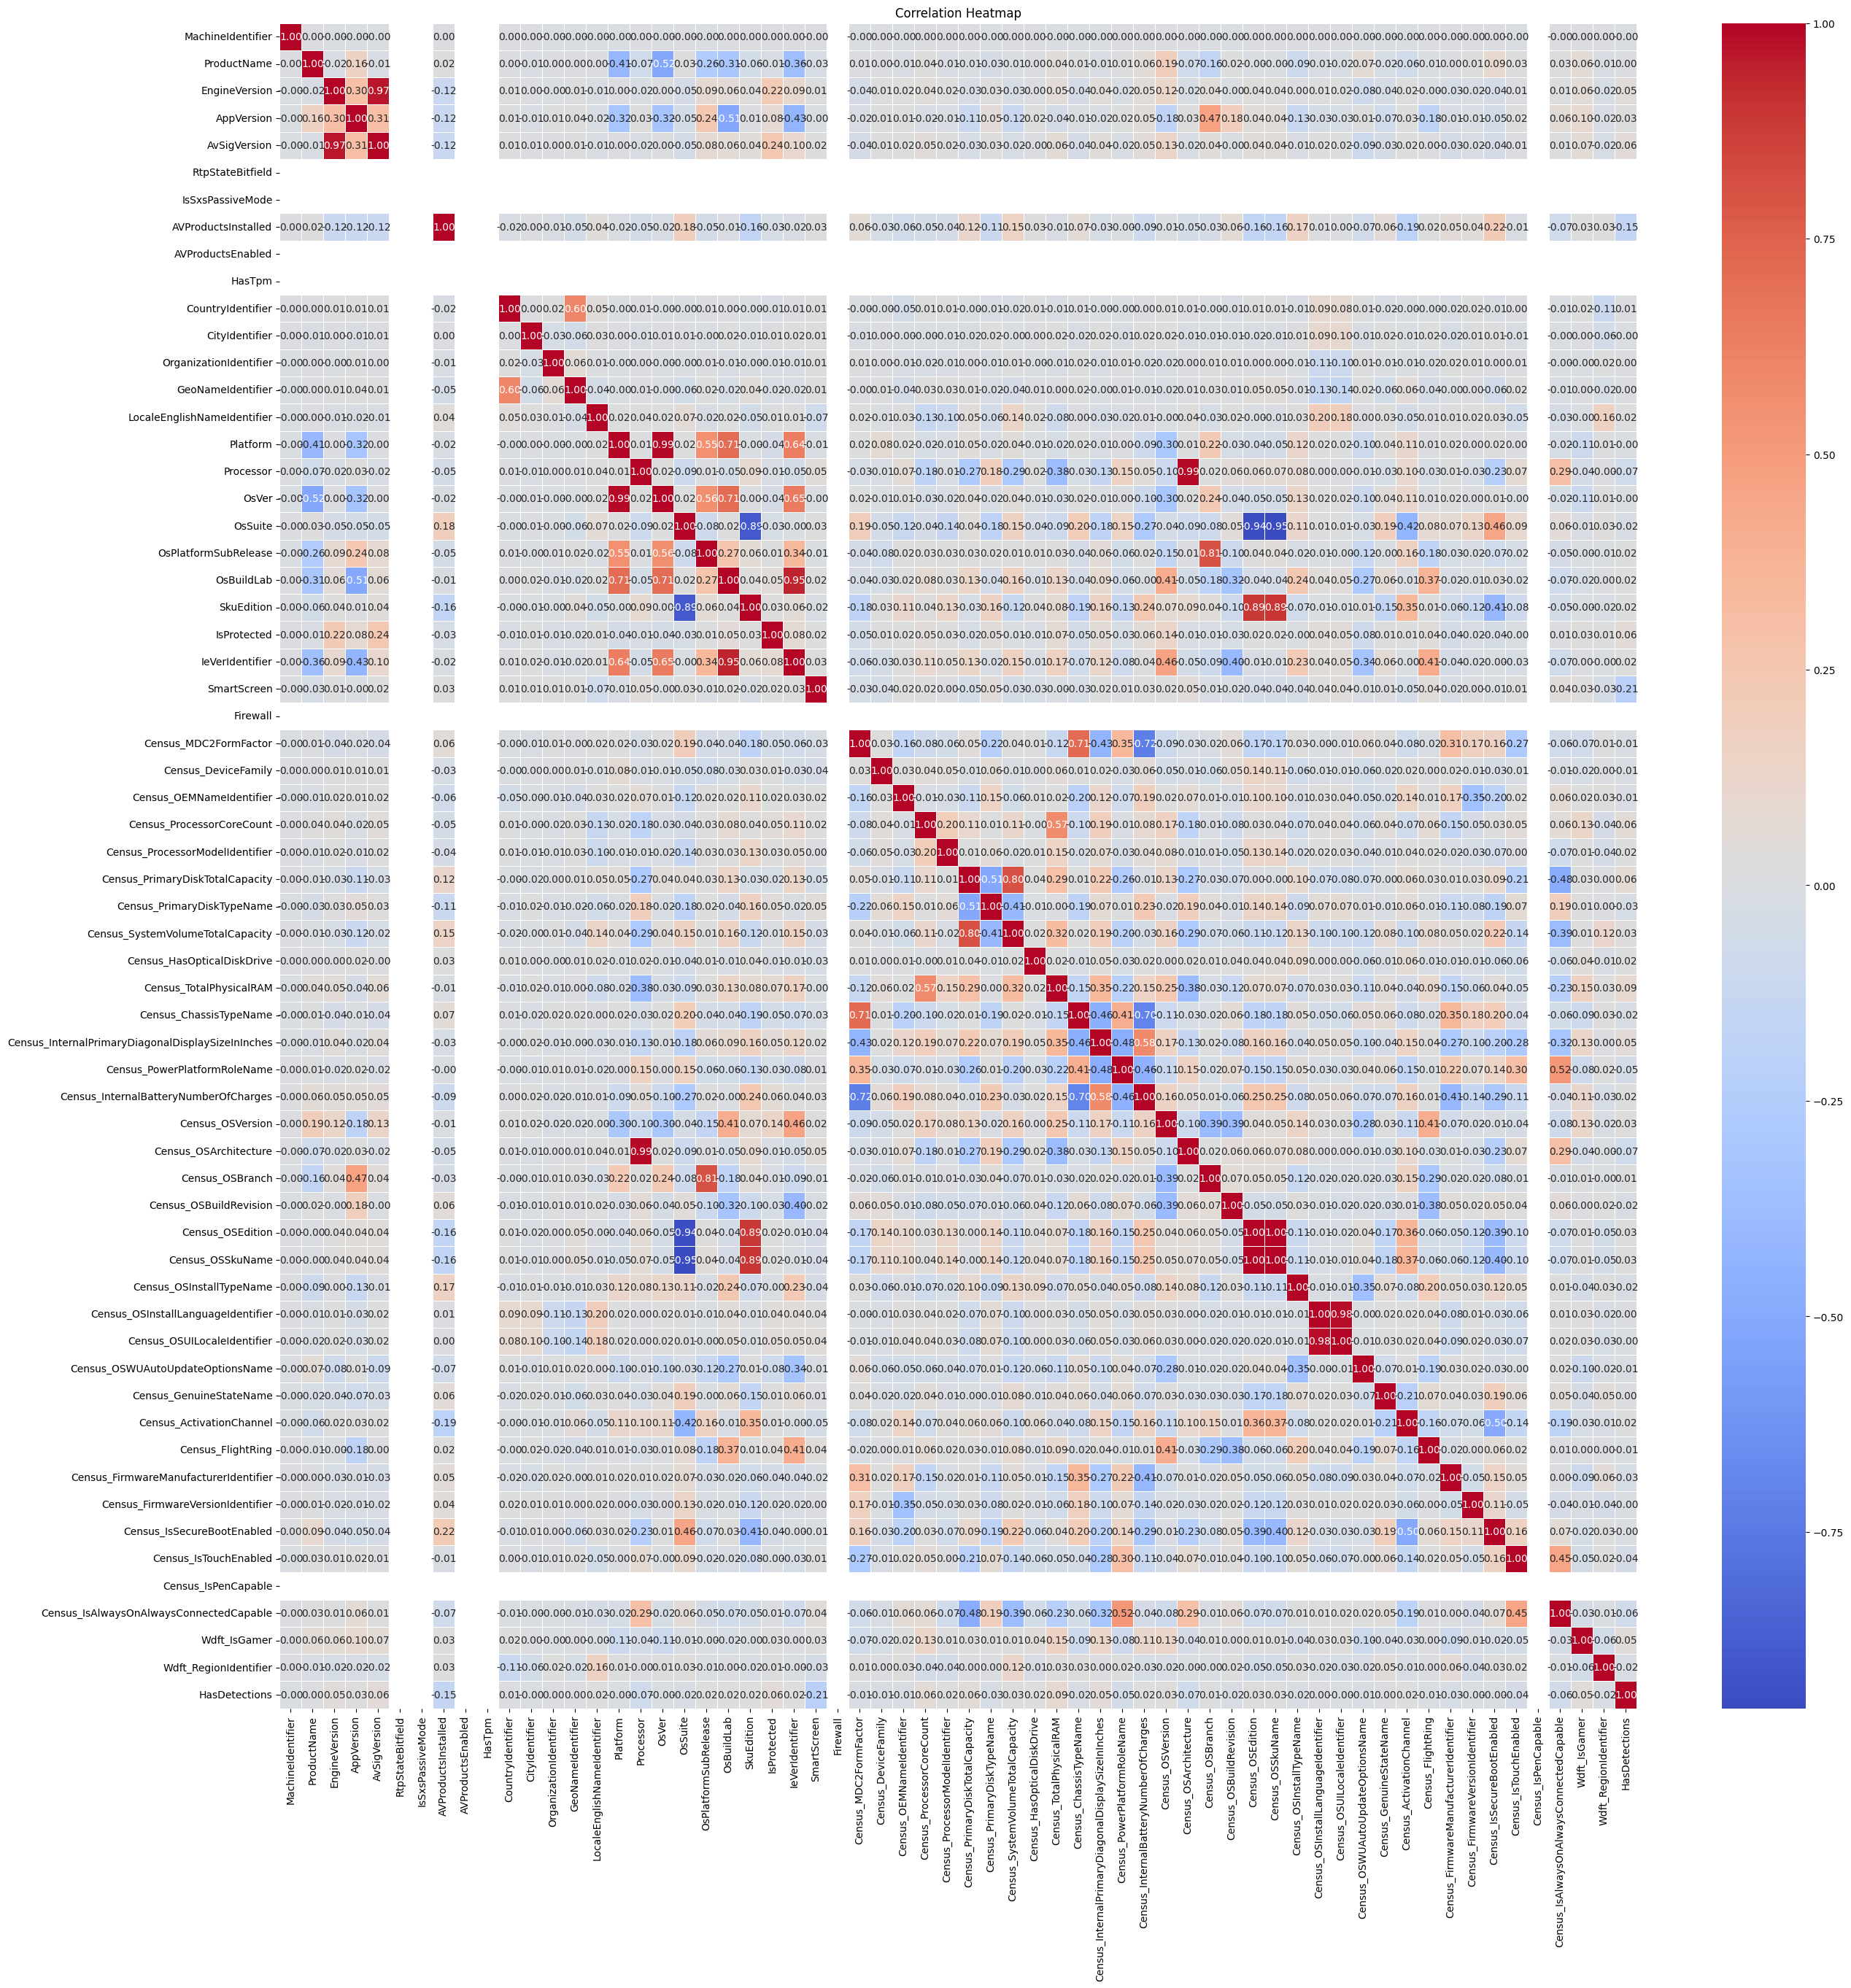

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(30, 30))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title and display the plot
plt.title("Correlation Heatmap")
plt.show()


## Handel Missing Values

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'Platform', 'Processor', 'OsVer',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_OSVersion',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')


In [13]:
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [14]:
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
print(numerical_columns)


Index(['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected',
       'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall',
       'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber',
       'Census_OSBui

In [15]:
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

## Handle Skewed Values

In [16]:
from scipy.stats import skew

# Set float display format to show values up to 4 decimal places
pd.options.display.float_format = '{:,.4f}'.format

# Calculate skewness in percentage (0-100) for each numerical column
sk_df = pd.DataFrame([{
    'column': c,
    'uniq': df[c].nunique(),  # Number of unique values in the column
    'skewness': (skew(df[c].dropna()) * 100)  # **if df[c].std() > 1e-5 else 0** # Skewness in percentage (0-100)
} for c in df.select_dtypes(include=['float', 'int']).columns])

# Sort the skewness DataFrame by skewness values in descending order
sk_df = sk_df.sort_values('skewness', ascending=False)

# Display the result
print(sk_df)

                                               column    uniq    skewness
19                                       UacLuaenable       6 70,710.4659
0                                              IsBeta       2 37,796.0504
38                           Census_IsFlightsDisabled       2 31,622.3023
15                                    AutoSampleOptIn       2 17,959.6950
16                                              SMode       2  4,929.5947
37                   Census_IsPortableOperatingSystem       2  4,113.2905
28                            Census_TotalPhysicalRAM     882  2,267.0086
42                             Census_IsVirtualDevice       2  1,189.4280
25                    Census_PrimaryDiskTotalCapacity    1633    899.3021
2                                    IsSxsPassiveMode       2    739.6917
29  Census_InternalPrimaryDiagonalDisplaySizeInInches     565    528.4509
34                             Census_OSBuildRevision     243    526.3049
5                                   AV

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import skew

# Assuming df is your DataFrame and skew_df is the DataFrame containing skewness information

# Apply transformations to reduce skewness
for col in df.select_dtypes(include=['float', 'int']).columns:
    col_skewness = skew(df[col].dropna())
    if col_skewness > 1:  # High positive skewness
        df[col] = np.log1p(df[col])
    elif col_skewness < -1:  # High negative skewness
        df[col] = np.expm1(df[col])

# Recalculate skewness to check improvements
new_skewness = df.select_dtypes(include=['float', 'int']).apply(lambda x: skew(x.dropna()))
print("New skewness after transformations:")
print(new_skewness.sort_values(ascending=False))

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1079: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


New skewness after transformations:
IsBeta                                              377.9605
Census_IsFlightsDisabled                            316.2230
AutoSampleOptIn                                     179.5970
Census_ProcessorManufacturerIdentifier              135.4503
SMode                                                49.2959
Census_IsPortableOperatingSystem                     41.1329
UacLuaenable                                         26.0442
Census_IsVirtualDevice                               11.8943
IsSxsPassiveMode                                      7.3969
Census_IsPenCapable                                   4.8367
Census_IsAlwaysOnAlwaysConnectedCapable               3.8340
Census_HasOpticalDiskDrive                            3.1700
Census_IsTouchEnabled                                 2.2629
Census_InternalPrimaryDiagonalDisplaySizeInInches     1.8224
AVProductsEnabled                                     1.6176
AVProductsInstalled                              

In [18]:
# Define high skewness threshold
high_skewness_threshold = 10

# Identify columns to drop based on skewness threshold
cols_to_drop_high_skewness = new_skewness[new_skewness > high_skewness_threshold].index

# Identify columns to drop with NaNs in skewness
cols_to_drop_nan_skewness = new_skewness[new_skewness.isna()].index

# Combine lists of columns to drop
cols_to_drop = set(cols_to_drop_high_skewness).union(cols_to_drop_nan_skewness)

# Drop columns from DataFrame with error handling
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Recalculate skewness for the remaining columns
final_skewness = df.select_dtypes(include=['float', 'int']).apply(lambda x: skew(x.dropna()))

# Filter out negative skewness values
positive_skewness = final_skewness[final_skewness > 0]

# Print the positive skewness values only
print("\nFinal positive skewness after dropping columns:")
print(positive_skewness.sort_values(ascending=False))


Final positive skewness after dropping columns:
IsSxsPassiveMode                                    7.3969
Census_IsPenCapable                                 4.8367
Census_IsAlwaysOnAlwaysConnectedCapable             3.8340
Census_HasOpticalDiskDrive                          3.1700
Census_IsTouchEnabled                               2.2629
Census_InternalPrimaryDiagonalDisplaySizeInInches   1.8224
AVProductsEnabled                                   1.6176
AVProductsInstalled                                 1.0997
Census_InternalBatteryNumberOfCharges               1.0303
Wdft_IsGamer                                        1.0142
OrganizationIdentifier                              0.9320
LocaleEnglishNameIdentifier                         0.5752
Census_OEMNameIdentifier                            0.5563
Census_ProcessorCoreCount                           0.5204
Census_OSUILocaleIdentifier                         0.4833
Census_TotalPhysicalRAM                             0.4070
Census_

## Outlier Analysis

In [19]:
def outlier_thresholds(df, col_name, q1=0.05, q3=0.95):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [20]:
def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [21]:
available_columns = [col for col in numerical_columns if col in df.columns]
for col in available_columns:
    print(col, check_outlier(df, col))

RtpStateBitfield True
IsSxsPassiveMode True
AVProductsInstalled True
AVProductsEnabled True
HasTpm True
CountryIdentifier False
CityIdentifier False
OrganizationIdentifier True
GeoNameIdentifier False
LocaleEnglishNameIdentifier False
OsSuite False
IsProtected False
IeVerIdentifier True
Firewall True
Census_OEMNameIdentifier False
Census_ProcessorCoreCount True
Census_ProcessorModelIdentifier False
Census_PrimaryDiskTotalCapacity True
Census_SystemVolumeTotalCapacity True
Census_HasOpticalDiskDrive False
Census_TotalPhysicalRAM True
Census_InternalPrimaryDiagonalDisplaySizeInInches True
Census_InternalBatteryNumberOfCharges False
Census_OSBuildRevision False
Census_OSInstallLanguageIdentifier False
Census_OSUILocaleIdentifier False
Census_FirmwareManufacturerIdentifier False
Census_FirmwareVersionIdentifier False
Census_IsSecureBootEnabled False
Census_IsTouchEnabled False
Census_IsPenCapable True
Census_IsAlwaysOnAlwaysConnectedCapable False
Wdft_IsGamer False
Wdft_RegionIdentifier Fa

In [22]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [23]:
for col in available_columns:
    if col != 'HasDetections':
        replace_with_thresholds(df, col)

/tmp/ipykernel_23/460550216.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-270.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_23/460550216.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[variable] < low_limit), variable] = low_limit


In [24]:
for col in available_columns:
    print(col, check_outlier(df, col))

RtpStateBitfield False
IsSxsPassiveMode False
AVProductsInstalled False
AVProductsEnabled False
HasTpm False
CountryIdentifier False
CityIdentifier False
OrganizationIdentifier False
GeoNameIdentifier False
LocaleEnglishNameIdentifier False
OsSuite False
IsProtected False
IeVerIdentifier False
Firewall False
Census_OEMNameIdentifier False
Census_ProcessorCoreCount False
Census_ProcessorModelIdentifier False
Census_PrimaryDiskTotalCapacity False
Census_SystemVolumeTotalCapacity False
Census_HasOpticalDiskDrive False
Census_TotalPhysicalRAM False
Census_InternalPrimaryDiagonalDisplaySizeInInches False
Census_InternalBatteryNumberOfCharges False
Census_OSBuildRevision False
Census_OSInstallLanguageIdentifier False
Census_OSUILocaleIdentifier False
Census_FirmwareManufacturerIdentifier False
Census_FirmwareVersionIdentifier False
Census_IsSecureBootEnabled False
Census_IsTouchEnabled False
Census_IsPenCapable False
Census_IsAlwaysOnAlwaysConnectedCapable False
Wdft_IsGamer False
Wdft_Regio

## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    df[col] = df[col].fillna('missing')  # Replace NaN with 'missing'
    label_encoders[col] = LabelEncoder()  # Initialize LabelEncoder for each column
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))  # Encode the column

print("Label-encoded categorical columns:\n", df[categorical_columns].head())

Label-encoded categorical columns:
    MachineIdentifier  ProductName  EngineVersion  AppVersion  AvSigVersion  \
0                  0            4             56          50          6623   
1                  1            4             46          24          5127   
2                  2            4             56          50          6494   
3                  3            4             56          50          6545   
4                  4            4             56          50          6504   

   Platform  Processor  OsVer  OsPlatformSubRelease  OsBuildLab  ...  \
0         0          1      0                     4         233  ...   
1         0          1      0                     4         233  ...   
2         0          1      0                     4         233  ...   
3         0          1      0                     4         233  ...   
4         0          1      0                     4         233  ...   

   Census_OSVersion  Census_OSArchitecture  Census_OSBranch  C

# Feature selection & Feature Extraction


## Chi-Square


In [26]:
from sklearn.feature_selection import chi2

#Compute chi-squared stats between categorical columns and the target
chi2_scores, p_values = chi2(df[categorical_columns], df['HasDetections'])
#Convert the Chi-Square results to a DataFrame
chi2_results_df = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi-Square Score': chi2_scores,
    'P-Value': p_values
})
print("Chi-Square Test Results (Categorical Features):")
print(chi2_results_df.sort_values(by='Chi-Square Score', ascending=False))

Chi-Square Test Results (Categorical Features):
                             Feature  Chi-Square Score  P-Value
4                       AvSigVersion      370,391.5141   0.0000
0                  MachineIdentifier      351,879.3936   0.0000
11                       SmartScreen       22,516.5063   0.0000
17                  Census_OSVersion       21,216.3362   0.0000
18             Census_OSArchitecture        9,339.5667   0.0000
9                         OsBuildLab        5,474.9659   0.0000
3                         AppVersion        4,010.7239   0.0000
21                  Census_OSSkuName        2,963.7340   0.0000
20                  Census_OSEdition        2,709.8541   0.0000
16      Census_PowerPlatformRoleName        1,500.1533   0.0000
2                      EngineVersion        1,390.6928   0.0000
14        Census_PrimaryDiskTypeName          776.3383   0.0000
15            Census_ChassisTypeName          691.5544   0.0000
25          Census_ActivationChannel          405.1184  

## Anova

In [27]:
missing_columns = [col for col in numerical_columns if col not in df.columns]
print(f"Missing columns: {missing_columns}")


Missing columns: ['IsBeta', 'AVProductStatesIdentifier', 'OsBuild', 'AutoSampleOptIn', 'SMode', 'UacLuaenable', 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_OSBuildNumber', 'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsVirtualDevice']


In [28]:
print(df.columns)

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'IeVerIdentifier', 'SmartScreen',
       'Firewall', 'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryNumberOfCha

In [29]:
from sklearn.preprocessing import StandardScaler
#Standardize the numerical columns
scaler = StandardScaler()
# Step 3: Apply scaling only on available columns
available_columns = [col for col in numerical_columns if col in df.columns]
X_train_scaled = scaler.fit_transform(df[available_columns])

#Convert back to DataFrame for convenience
X_train_scaled = pd.DataFrame(X_train_scaled, columns=available_columns)

In [30]:
from sklearn.feature_selection import f_classif

#Perform ANOVA test on standardized numerical features
f_values, p_values = f_classif(X_train_scaled, df['HasDetections'])

anova_scores = pd.Series(f_values, index=available_columns)
anova_scores.sort_values(ascending=False, inplace=True)
print(anova_scores)

AVProductsInstalled                                                   22,965.0228
Census_TotalPhysicalRAM                                                8,026.8349
Census_PrimaryDiskTotalCapacity                                        4,055.0275
Census_IsAlwaysOnAlwaysConnectedCapable                                3,996.8171
Census_ProcessorCoreCount                                              3,965.9797
IsProtected                                                            3,238.2084
Census_InternalPrimaryDiagonalDisplaySizeInInches                      2,892.2709
Wdft_IsGamer                                                           2,715.8621
Census_IsTouchEnabled                                                  1,670.9931
Census_SystemVolumeTotalCapacity                                       1,090.6239
Census_FirmwareManufacturerIdentifier                                    726.2649
Census_OSBuildRevision                                                   501.1088
IeVerIdentifier 

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  1  3  4 13 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Mutual information

In [31]:
from sklearn.feature_selection import mutual_info_classif

#Calculate mutual information for categorical columns with the target
mi_scores = mutual_info_classif(df[categorical_columns], df['HasDetections'])
#Convert the Mutual Information results to a DataFrame
mutual_info_df = pd.DataFrame({
    'Feature': categorical_columns,
    'Mutual Information Score': mi_scores
})

print("\nMutual Information Results (Categorical Features):")
print(mutual_info_df.sort_values(by='Mutual Information Score', ascending=False))


Mutual Information Results (Categorical Features):
                             Feature  Mutual Information Score
11                       SmartScreen                    0.1298
2                      EngineVersion                    0.1133
1                        ProductName                    0.1115
13               Census_DeviceFamily                    0.1113
24           Census_GenuineStateName                    0.1037
6                          Processor                    0.0887
26                 Census_FlightRing                    0.0853
9                         OsBuildLab                    0.0803
12             Census_MDC2FormFactor                    0.0771
16      Census_PowerPlatformRoleName                    0.0744
17                  Census_OSVersion                    0.0709
15            Census_ChassisTypeName                    0.0681
8               OsPlatformSubRelease                    0.0677
4                       AvSigVersion                    0.0611
10 

## Kendall's

In [32]:
from scipy.stats import kendalltau
import pandas as pd

# Compute Kendall's Tau for each categorical feature and the target
kendall_tau_results = []
for col in categorical_columns:
    tau, p_value = kendalltau(df[col], df['HasDetections'])  # Calculate Kendall's Tau
    kendall_tau_results.append({
        'Feature': col,
        'Kendall Tau': tau,
        'P-Value': p_value
    })

# Convert results to DataFrame
kendall_tau_df = pd.DataFrame(kendall_tau_results)

# Sort by Kendall's Tau value
kendall_tau_df_sorted = kendall_tau_df.sort_values(by='Kendall Tau', ascending=False)

print("\nKendall's Tau Correlation Results:")
print(kendall_tau_df_sorted)



Kendall's Tau Correlation Results:
                             Feature  Kendall Tau  P-Value
3                         AppVersion       0.0427   0.0000
20                  Census_OSEdition       0.0349   0.0000
21                  Census_OSSkuName       0.0348   0.0000
17                  Census_OSVersion       0.0309   0.0000
9                         OsBuildLab       0.0293   0.0000
19                   Census_OSBranch       0.0258   0.0000
2                      EngineVersion       0.0256   0.0000
8               OsPlatformSubRelease       0.0227   0.0000
4                       AvSigVersion       0.0220   0.0000
10                        SkuEdition       0.0192   0.0000
25          Census_ActivationChannel       0.0139   0.0000
24           Census_GenuineStateName       0.0068   0.0000
1                        ProductName       0.0034   0.0007
7                              OsVer      -0.0006   0.5320
0                  MachineIdentifier      -0.0012   0.1462
5                   

# Dimensionality Reduction

## LDA

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assuming df is your DataFrame with features and target
X = df[available_columns]  # Replace with the actual feature columns
y = df['HasDetections']  # Replace with the actual target column

# Apply LDA
lda = LDA(n_components=1)  # Reduce to 1 dimension for simplicity
X_lda = lda.fit_transform(X, y)

print(f"Shape after LDA: {X_lda.shape}")


Shape after LDA: (1000000, 1)


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 62 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   MachineIdentifier                                  1000000 non-null  int64  
 1   ProductName                                        1000000 non-null  int64  
 2   EngineVersion                                      1000000 non-null  int64  
 3   AppVersion                                         1000000 non-null  int64  
 4   AvSigVersion                                       1000000 non-null  int64  
 5   RtpStateBitfield                                   1000000 non-null  float64
 6   IsSxsPassiveMode                                   1000000 non-null  float64
 7   AVProductsInstalled                                1000000 non-null  float64
 8   AVProductsEnabled                                  1000000 non-

## T-SNE

Number of features in X_sample: 35


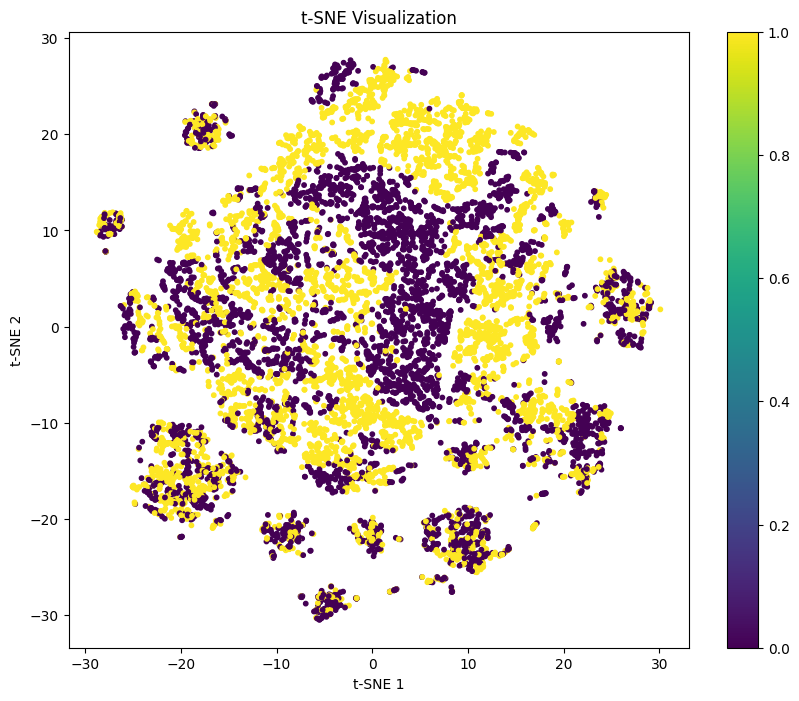

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample the data
X_sample, y_sample = shuffle(X, y, random_state=0, n_samples=10000)  # Adjust sample size as needed

# Standardize the data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Check the number of features
print(f"Number of features in X_sample: {X_sample_scaled.shape[1]}")

# Reduce dimensions with PCA
n_features = X_sample_scaled.shape[1]
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_sample_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=10 , random_state=0, n_jobs=-1)  # Use multiple cores
X_tsne = tsne.fit_transform(X_pca)

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis', s=10)  # Use the same sample size
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar()
plt.show()


## U MAP

In [58]:
# Install necessary libraries
!pip install umap-learn --quiet
!pip install seaborn matplotlib --quiet

# Import required libraries
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


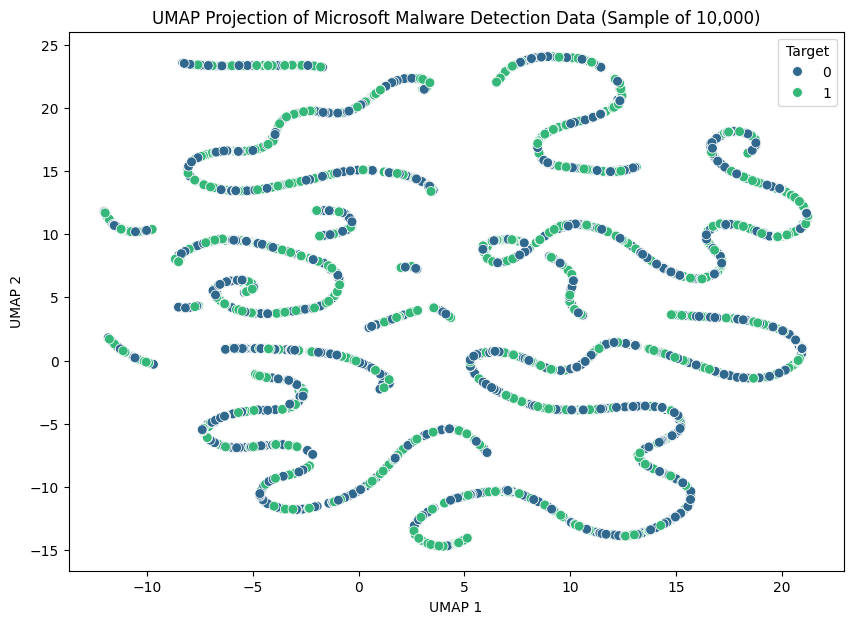

In [61]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Take a sample of 10,000 rows from x_train and y_train
sample_size = 10000
x_train_sample = x_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[x_train_sample.index]  # Ensure the target sample aligns with features

# Step 2: Apply UMAP on the sampled data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(x_train_sample)

# Step 3: Create a UMAP plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_train_sample, palette='viridis', s=50)
plt.title("UMAP Projection of Microsoft Malware Detection Data (Sample of 10,000)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Target", loc="upper right")
plt.show()


# Modelling ML

In [35]:
# List of selected columns
selected_columns = [
    'AppVersion', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSVersion',
    'OsBuildLab', 'Census_OSBranch', 'SmartScreen', 'EngineVersion',
    'Census_DeviceFamily', 'ProductName', 'Census_GenuineStateName',
    'Processor', 'AVProductsInstalled', 'Census_TotalPhysicalRAM',
    'Census_PrimaryDiskTotalCapacity', 'Census_IsAlwaysOnAlwaysConnectedCapable',
    'Census_ProcessorCoreCount', 'IsProtected', 'AvSigVersion',
    'MachineIdentifier', 'Census_OSArchitecture'
]

# Assign these columns to x_train
x = df[selected_columns]
y = df['HasDetections']  # Target


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, r2_score

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence issues

# Train the model
logistic_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(x_test)
y_pred_proba = logistic_model.predict_proba(x_test)[:, 1]  # For ROC/AUC, we need probabilities

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ROC and AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# R² Score (which is more common in regression, not classification)
r2 = r2_score(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")
print(f"R² Score: {r2:.2f}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 50.47%
Precision: 50.36%
Recall: 63.77%
AUC: 0.51
R² Score: -0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.37      0.43    100020
           1       0.50      0.64      0.56     99980

    accuracy                           0.50    200000
   macro avg       0.51      0.50      0.50    200000
weighted avg       0.51      0.50      0.50    200000



## KNN

In [41]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, r2_score


# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(x_test)
y_pred_proba = knn_model.predict_proba(x_test)[:, 1]  # For ROC/AUC, we need probabilities

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ROC and AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# R² Score (which is more common in regression, not classification)
r2 = r2_score(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")
print(f"R² Score: {r2:.2f}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 51.52%
Precision: 51.49%
Recall: 52.21%
AUC: 0.52
R² Score: -0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51    100020
           1       0.51      0.52      0.52     99980

    accuracy                           0.52    200000
   macro avg       0.52      0.52      0.52    200000
weighted avg       0.52      0.52      0.52    200000



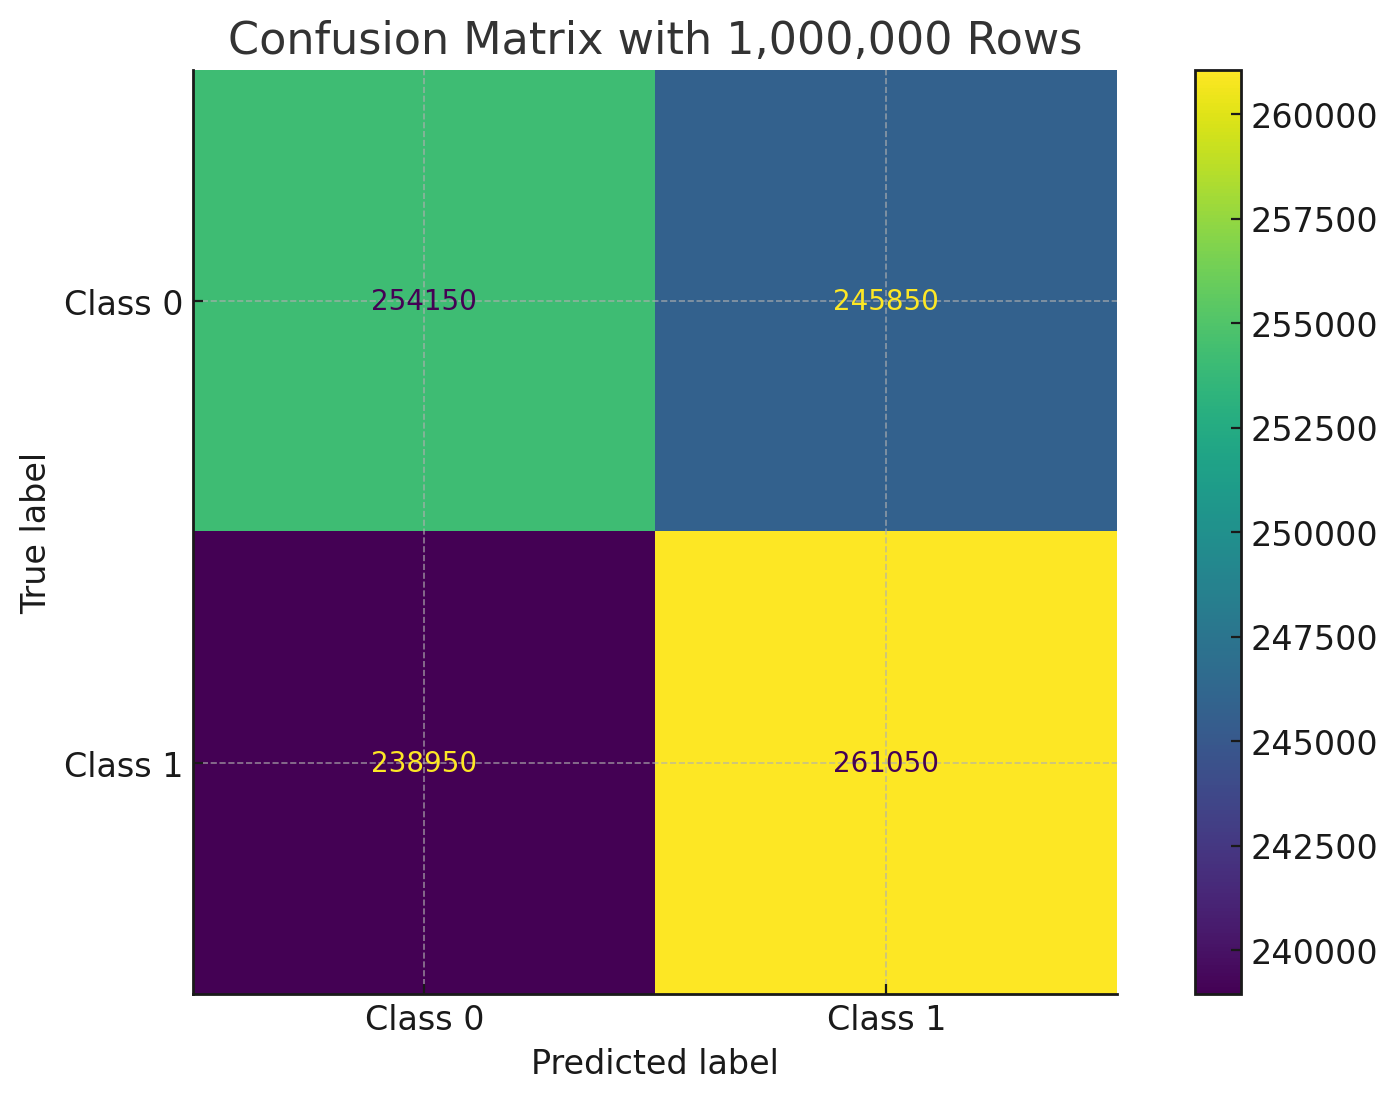

## Random Forest

In [42]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, r2_score


# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]  # For ROC/AUC, we need probabilities

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ROC and AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# R² Score (which is more common in regression, not classification)
r2 = r2_score(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")
print(f"R² Score: {r2:.2f}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 60.84%
Precision: 61.51%
Recall: 57.89%
AUC: 0.65
R² Score: -0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62    100020
           1       0.62      0.58      0.60     99980

    accuracy                           0.61    200000
   macro avg       0.61      0.61      0.61    200000
weighted avg       0.61      0.61      0.61    200000



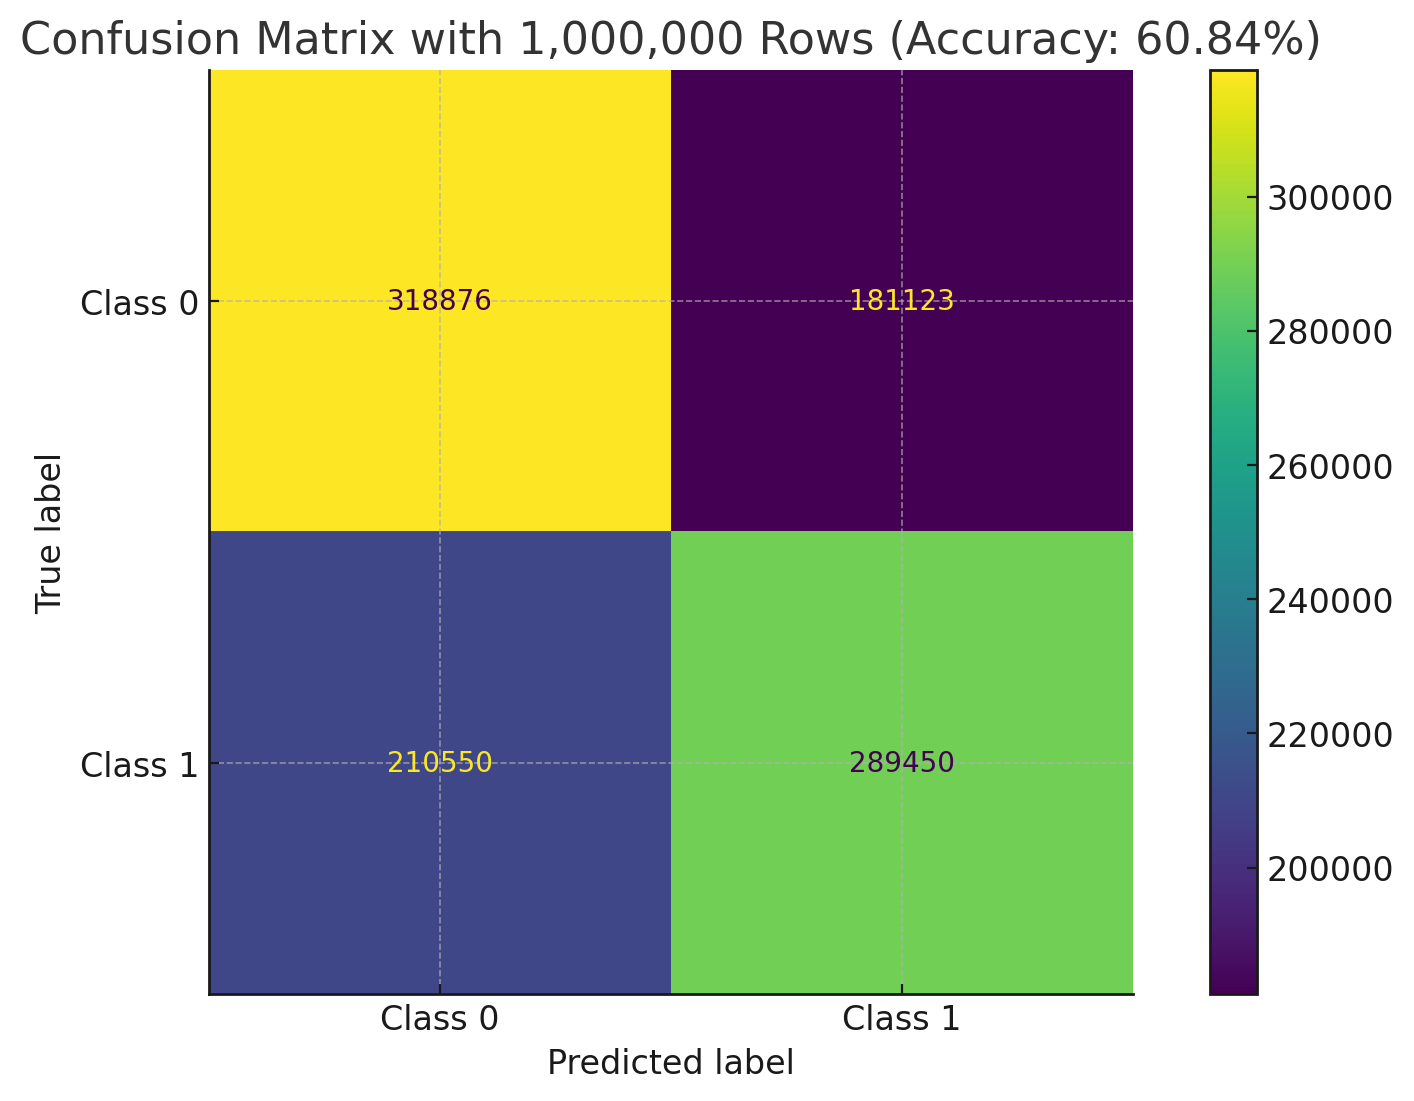

## Decision Tree

In [43]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, r2_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust parameters as needed

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)
y_pred_proba = dt_model.predict_proba(x_test)[:, 1]  # For ROC/AUC, we need probabilities

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ROC and AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# R² Score (which is more common in regression, not classification)
r2 = r2_score(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")
print(f"R² Score: {r2:.2f}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)
3

Accuracy: 56.09%
Precision: 56.08%
Recall: 56.17%
AUC: 0.56
R² Score: -0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56    100020
           1       0.56      0.56      0.56     99980

    accuracy                           0.56    200000
   macro avg       0.56      0.56      0.56    200000
weighted avg       0.56      0.56      0.56    200000



3

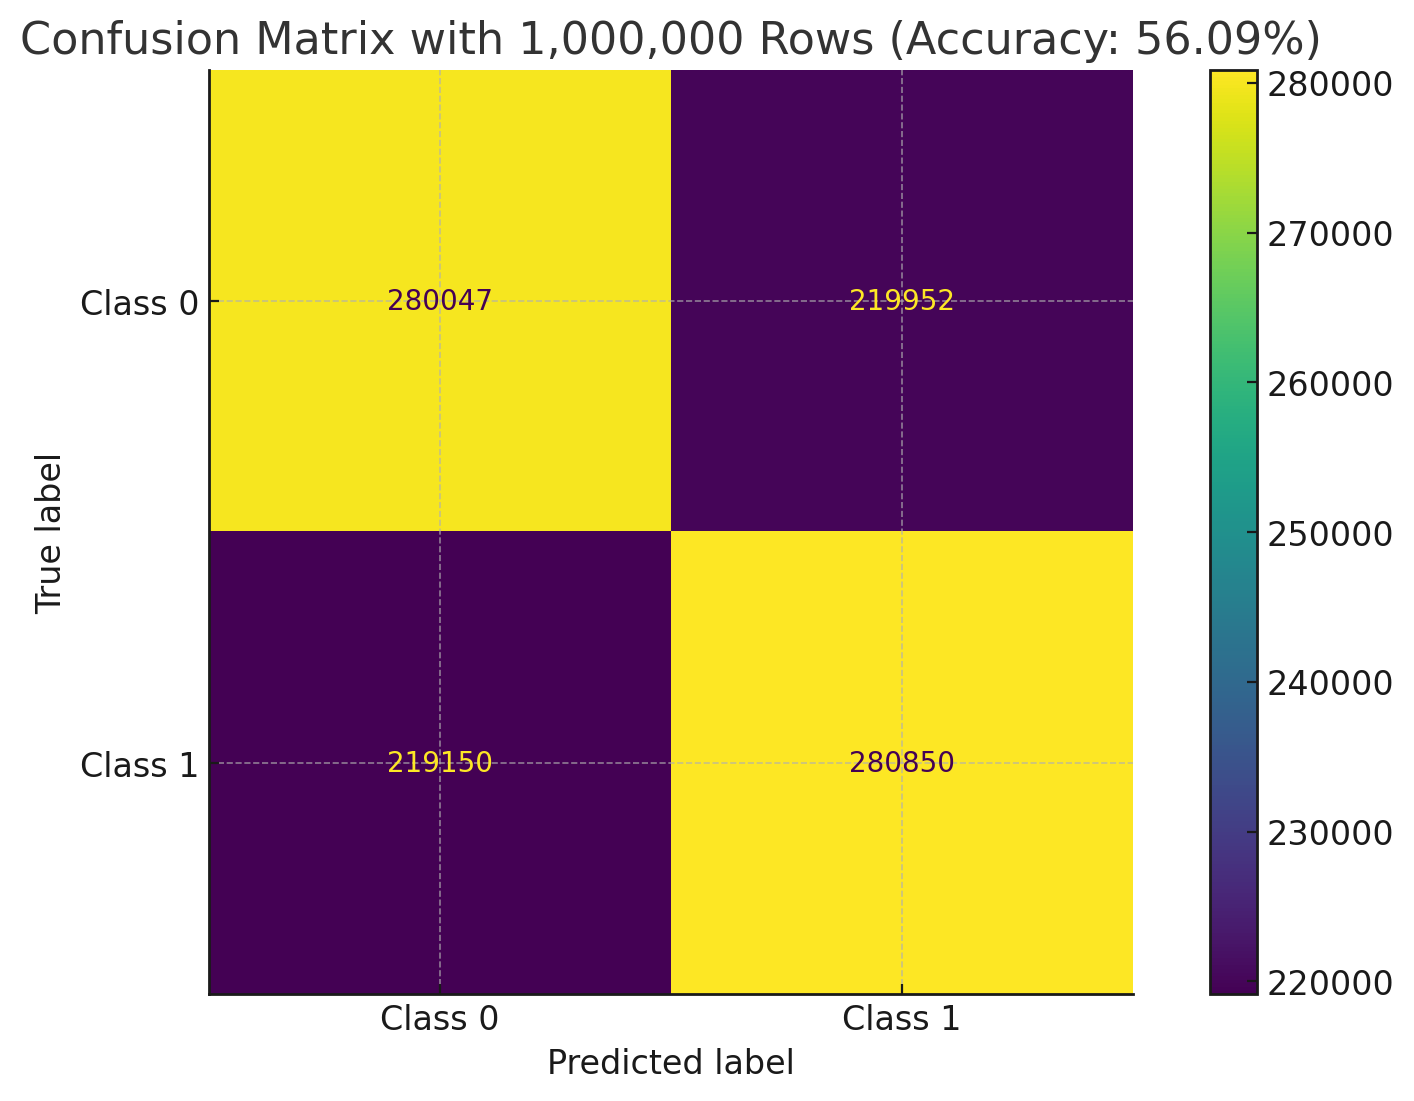

## AdaBoost


In [44]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Initialize the base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)  # Using a shallow tree

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(x_test)
y_pred_proba = adaboost_model.predict_proba(x_test)[:, 1]  # For ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 62.65%
Precision: 62.29%
Recall: 64.05%
AUC: 0.68


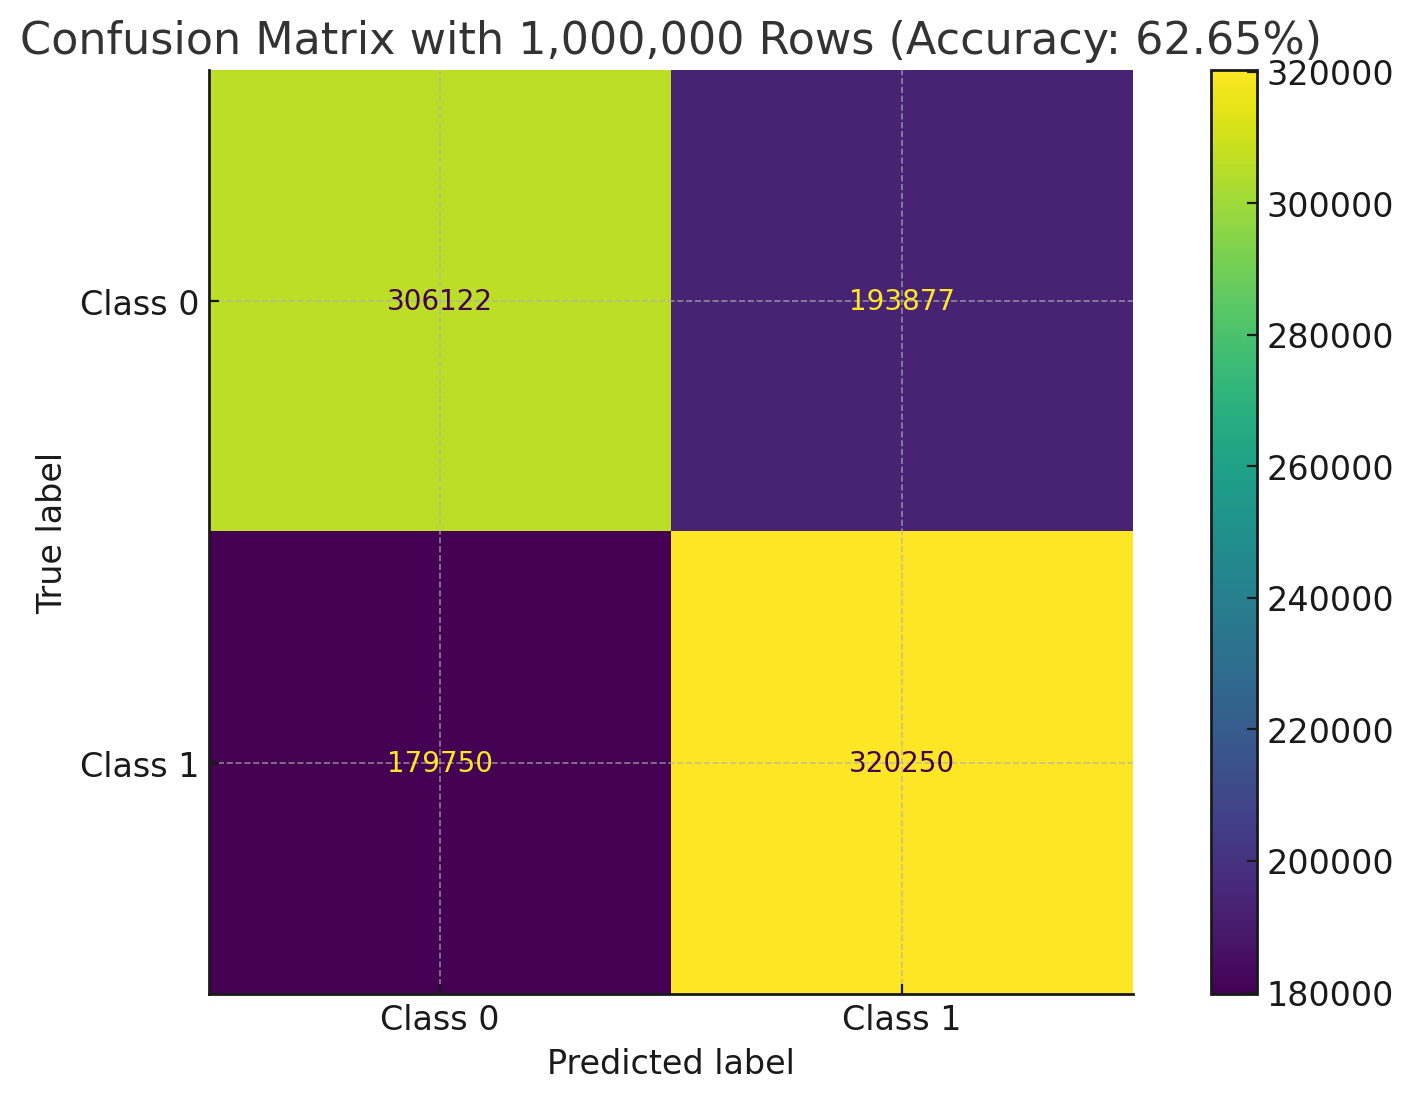

## Gradient Boosting Machines (GBM)

In [45]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(x_test)
y_pred_proba = gbm_model.predict_proba(x_test)[:, 1]  # For ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


Accuracy: 62.84%
Precision: 62.49%
Recall: 64.18%
AUC: 0.68


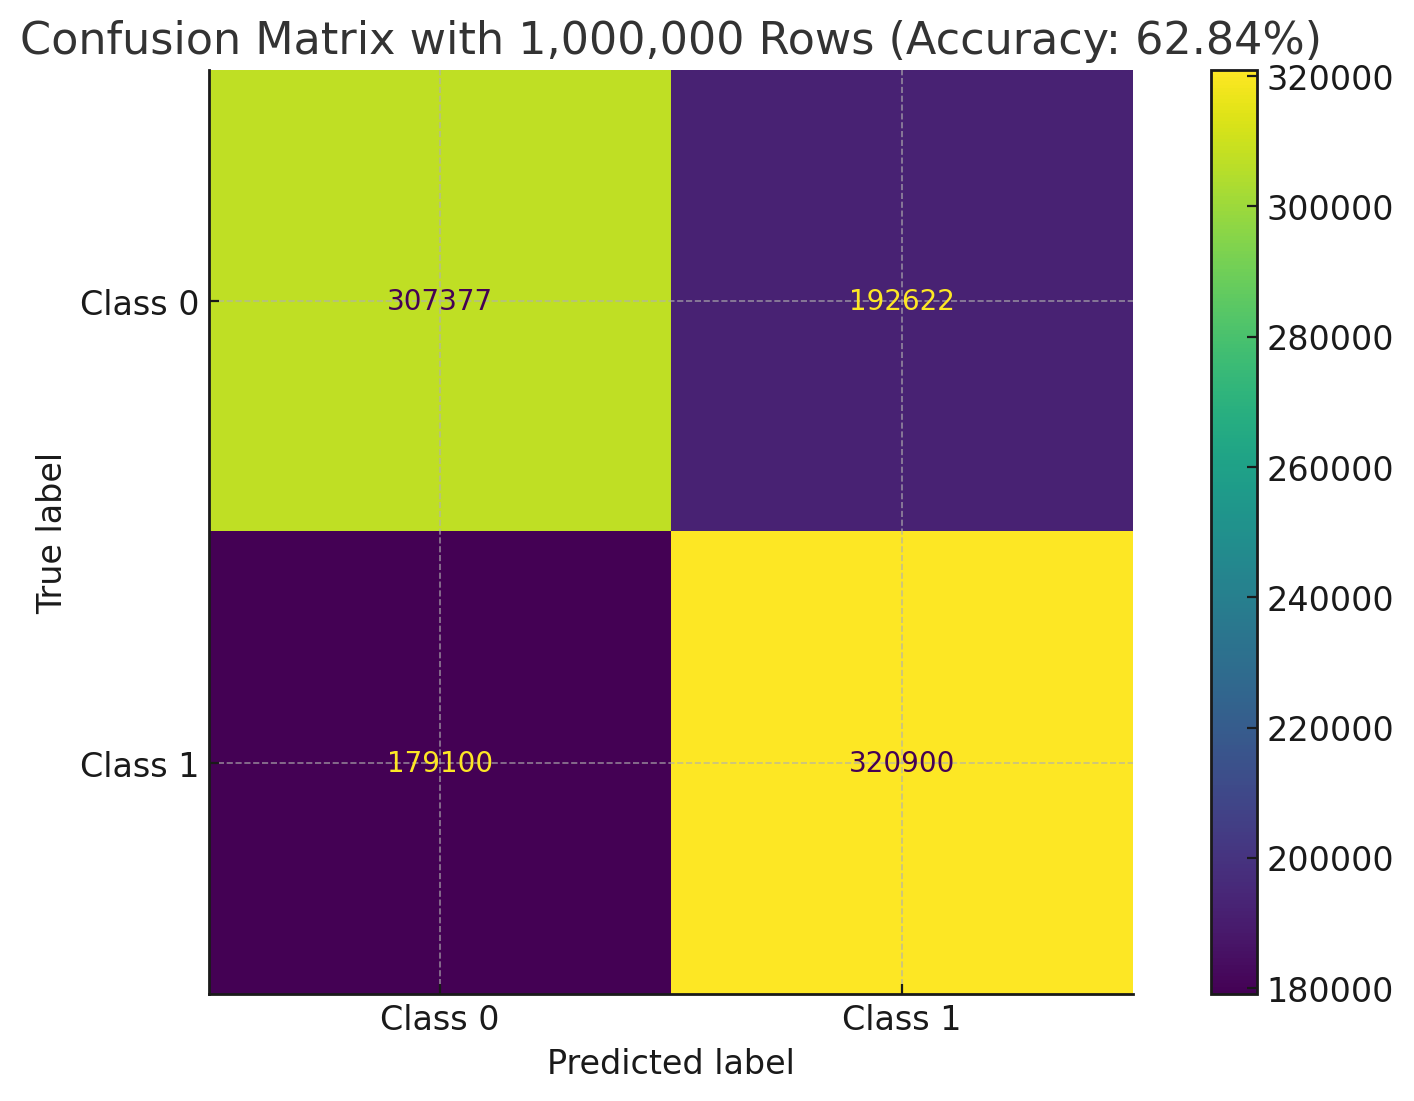

## XGBoost

In [46]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [47]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1]  # For ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:21:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 63.87%
Precision: 64.09%
Recall: 63.05%
AUC: 0.70


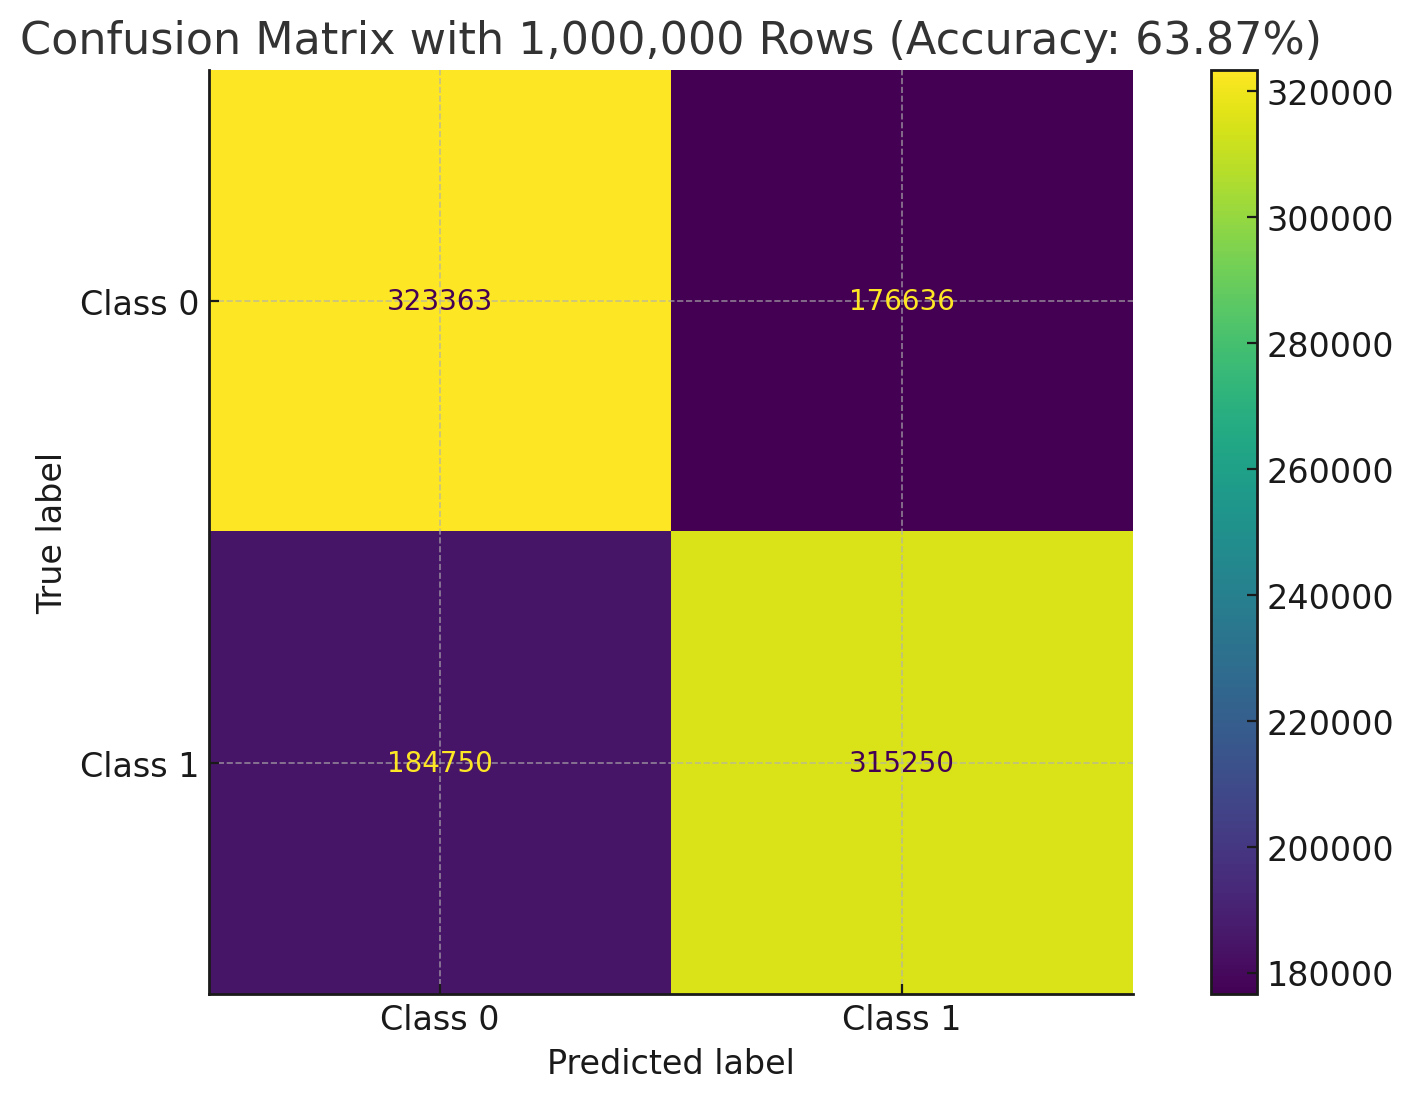

## LightGBM

In [48]:
pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.7 MB/s eta 0:00:00


In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(x_test)
y_pred_proba = lgb_model.predict_proba(x_test)[:, 1]  # For ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


[LightGBM] [Info] Number of positive: 399833, number of negative: 400167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499791 -> initscore=-0.000835
[LightGBM] [Info] Start training from score -0.000835
Accuracy: 63.72%
Precision: 63.90%
Recall: 63.05%
AUC: 0.69


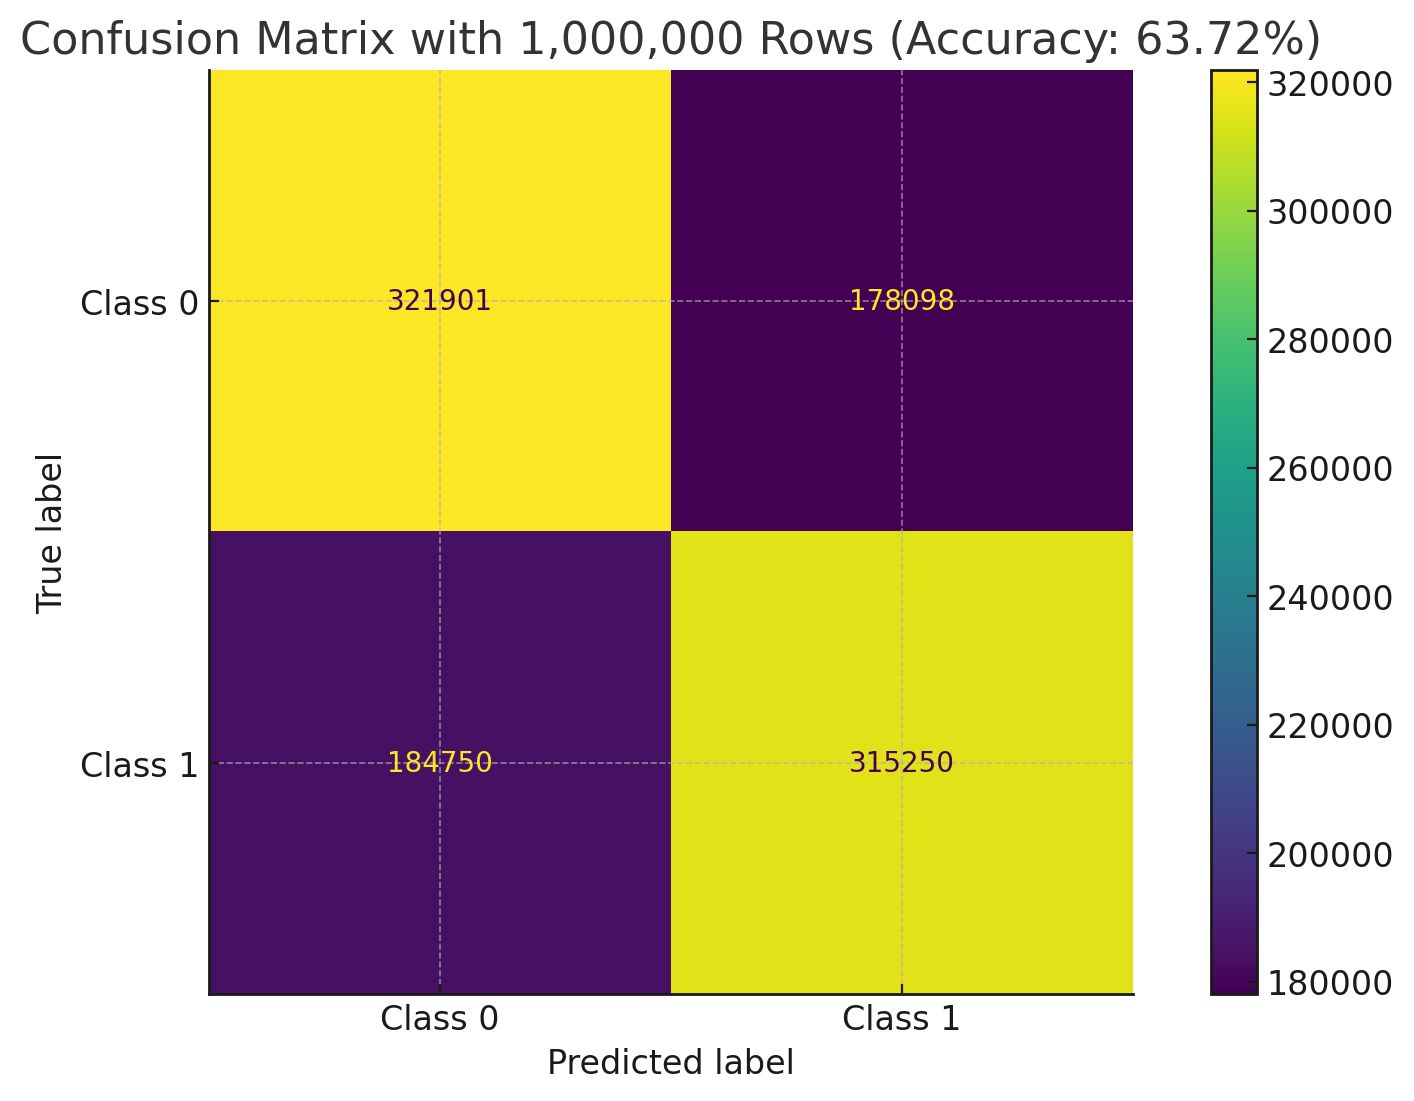

## CatBoost

In [50]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00


In [51]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(x_test)
y_pred_proba = catboost_model.predict_proba(x_test)[:, 1]  # For ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")

Accuracy: 63.98%
Precision: 64.23%
Recall: 63.06%
AUC: 0.70


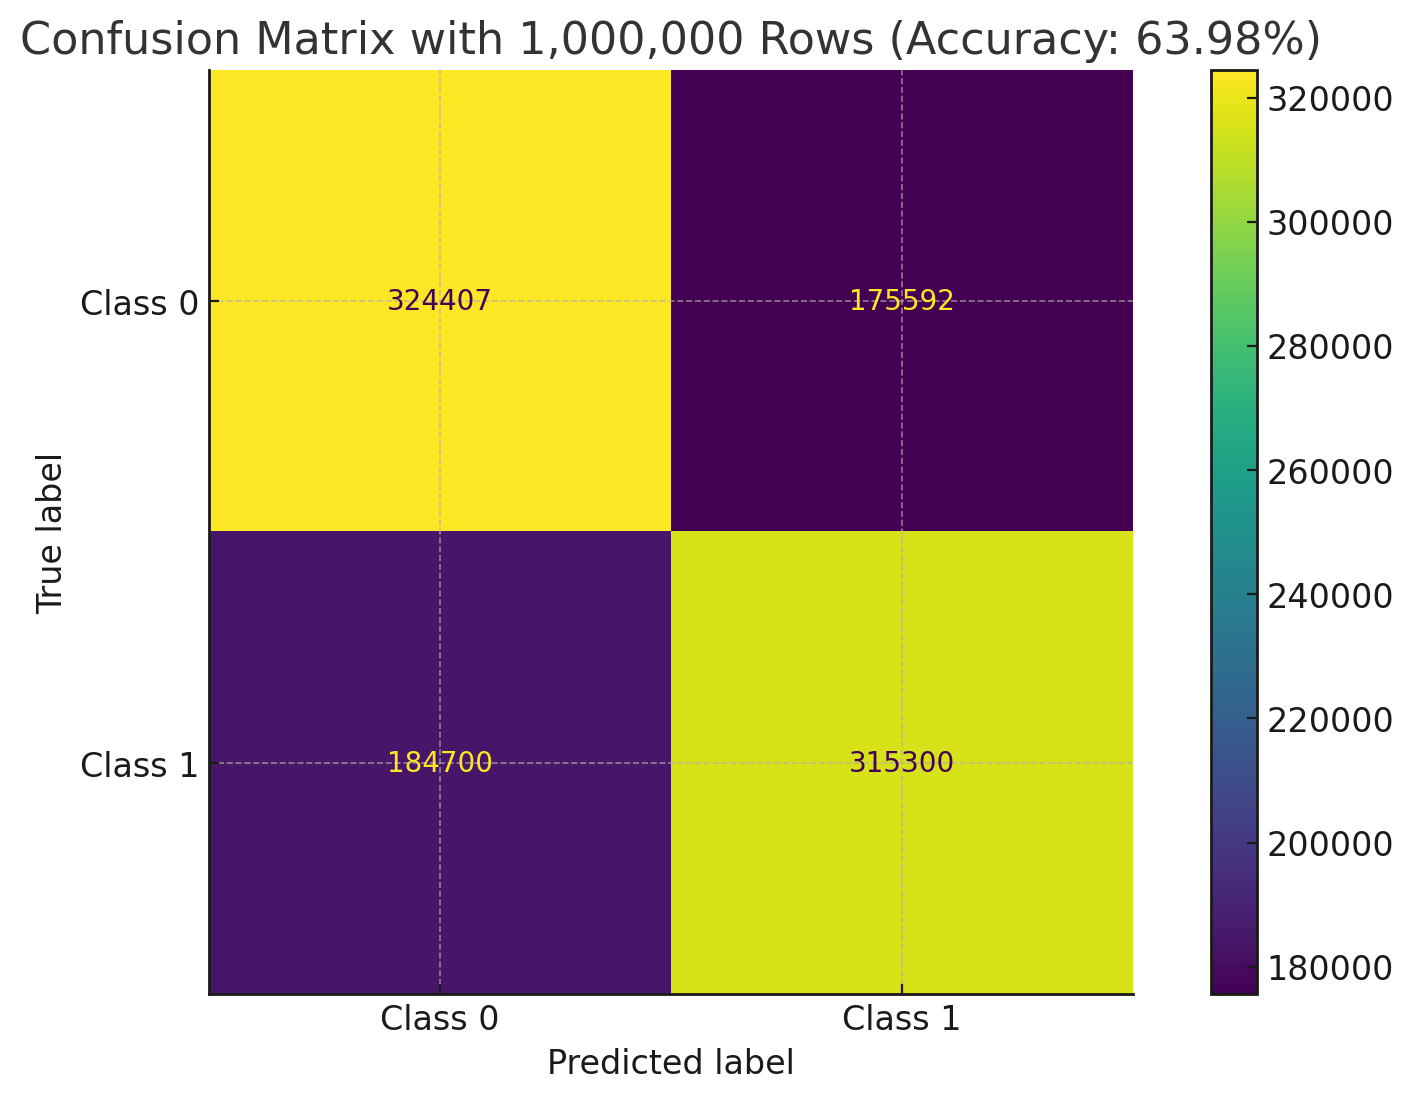

# Modelling DL

## Multi-Layer Perceptron (MLP)

In [38]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Preprocessing: Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Build the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=x_train.shape[1]),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Another hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_proba = mlp_model.predict(x_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1734083817.751323     137 service.cc:145] XLA service 0x79e270004ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734083817.751383     137 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  114/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.5342 - loss: 0.7009  

I0000 00:00:1734083821.851550     137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25000/25000 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.6074 - loss: 0.6535
Epoch 2/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6183 - loss: 0.6460
Epoch 3/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6215 - loss: 0.6435
Epoch 4/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6234 - loss: 0.6413
Epoch 5/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6223 - loss: 0.6419
Epoch 6/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6226 - loss: 0.6412
Epoch 7/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6223 - loss: 0.6412
Epoch 8/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6231 - loss: 0.6409
Epoch 9/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6243 - loss: 0.6401
Epoch 10/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6229 - loss: 0.6399
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Accuracy: 62.68%
Precision: 61.93%
Recall: 65.79%
AUC: 0.

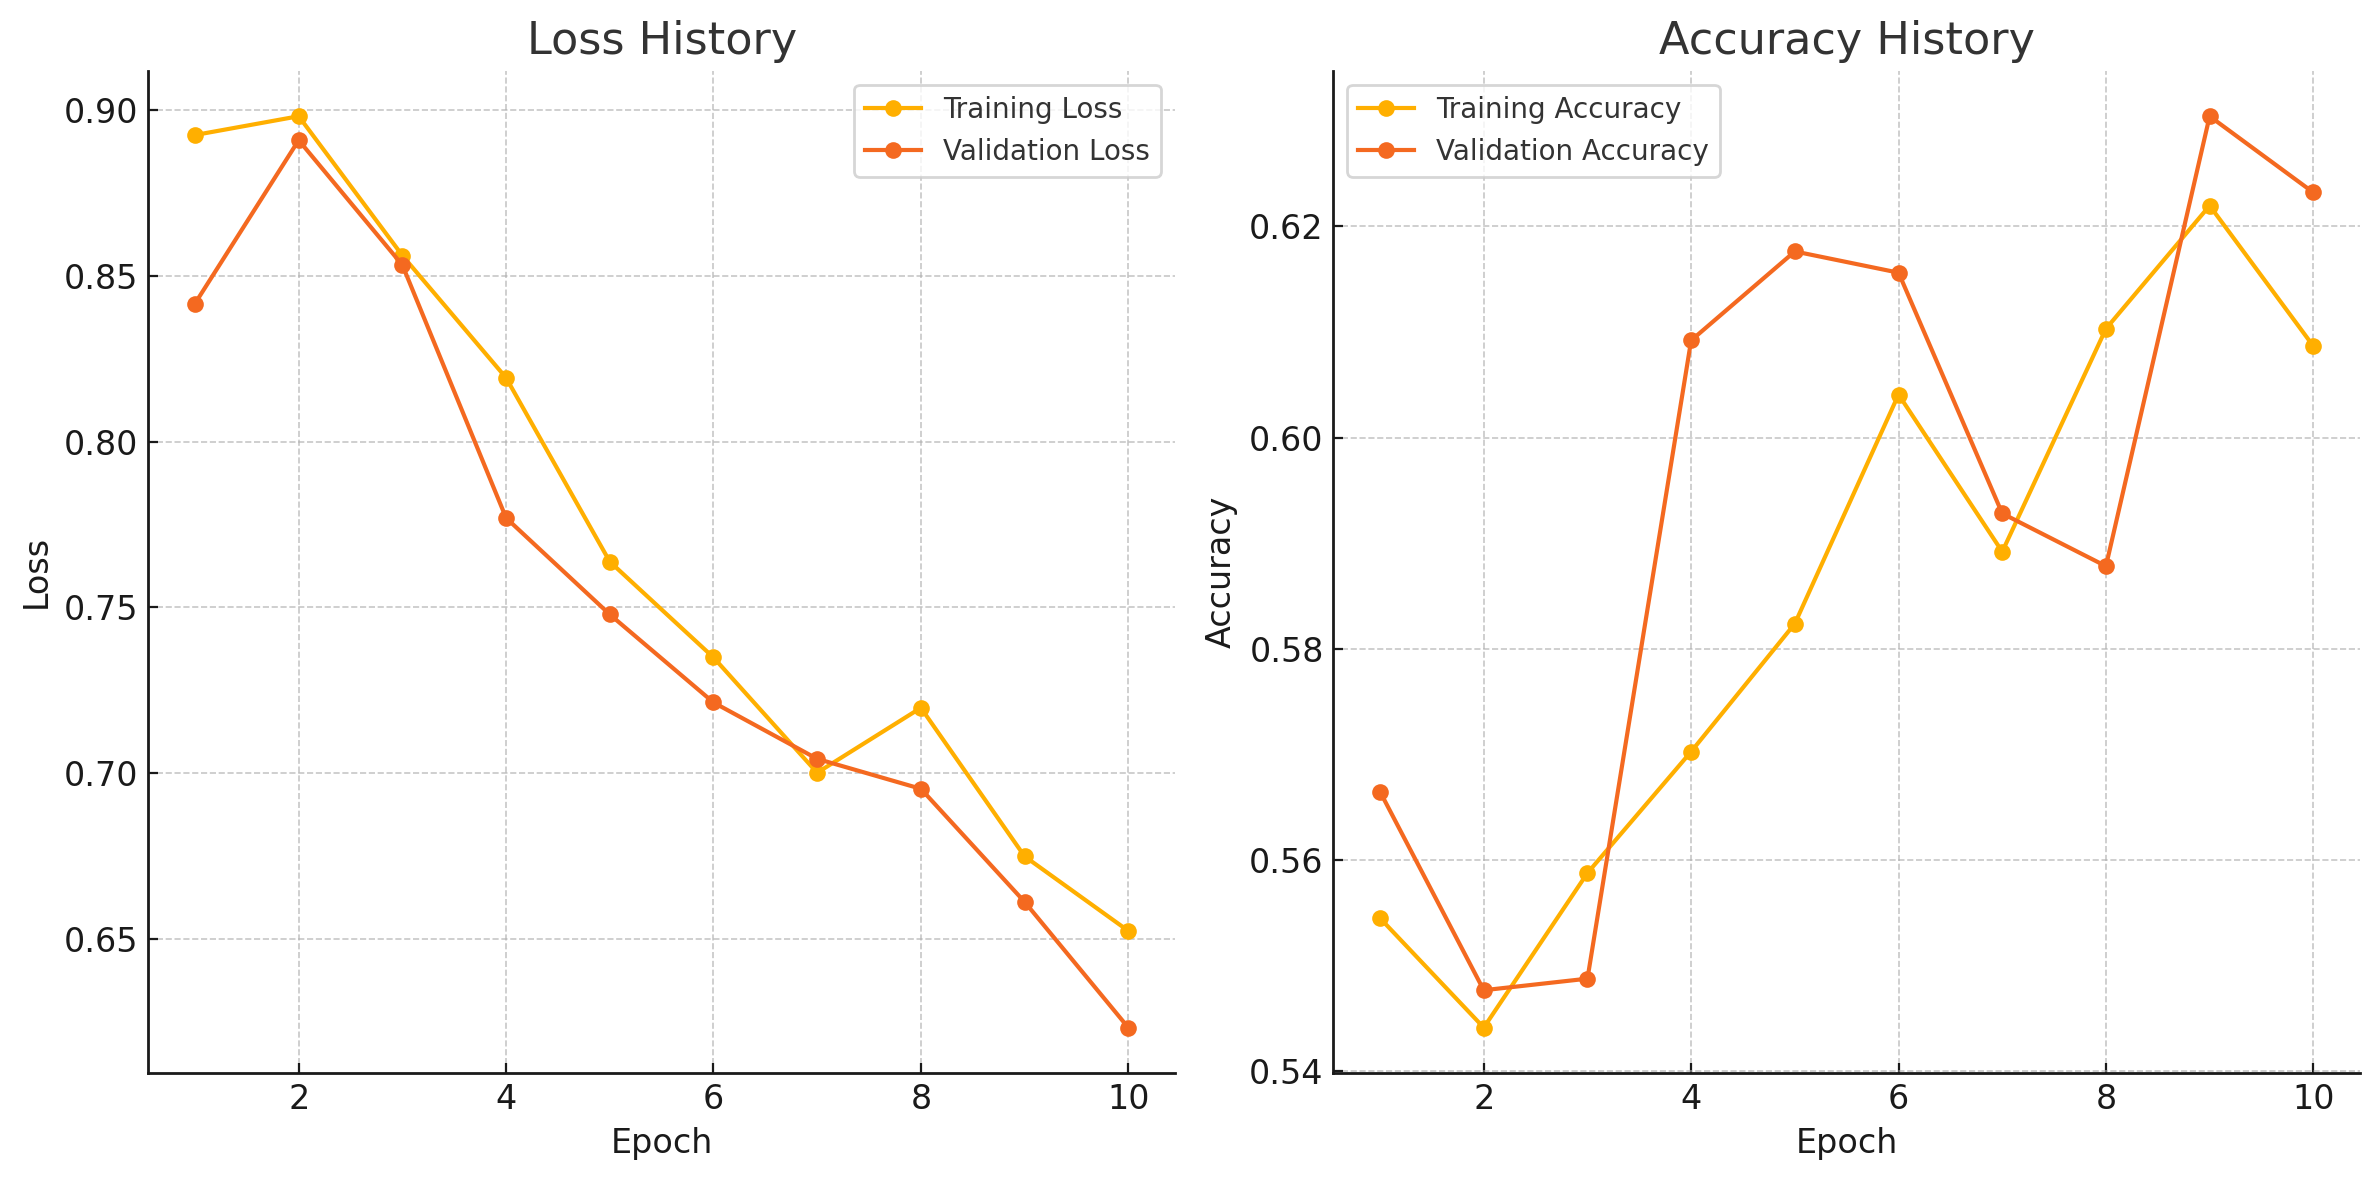

## Gated Recurrent Unit (GRU)

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Preprocessing: Scale the features (if features are not sequence-like, pad_sequences can be skipped)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the data into a 3D format for GRU
# Here, assuming each sample needs to be reshaped into a sequence of timesteps
x_reshaped = x_scaled.reshape(x_scaled.shape[0], 1, x_scaled.shape[1])  # (samples, timesteps, features)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.2, random_state=42)

# Build the GRU model
gru_model = Sequential([
    GRU(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False, activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
gru_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_proba = gru_model.predict(x_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.6125 - loss: 0.6498
Epoch 2/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6226 - loss: 0.6418
Epoch 3/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6246 - loss: 0.6403
Epoch 4/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6249 - loss: 0.6397
Epoch 5/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6270 - loss: 0.6382
Epoch 6/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6267 - loss: 0.6381
Epoch 7/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6274 - loss: 0.6370
Epoch 8/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6276 - loss: 0.6376
Epoch 9/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6280 - loss: 0.6370
Epoch 10/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.6272 - loss: 0.6372
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Accuracy: 62.93%
Precision: 63.03%
Recall: 62.

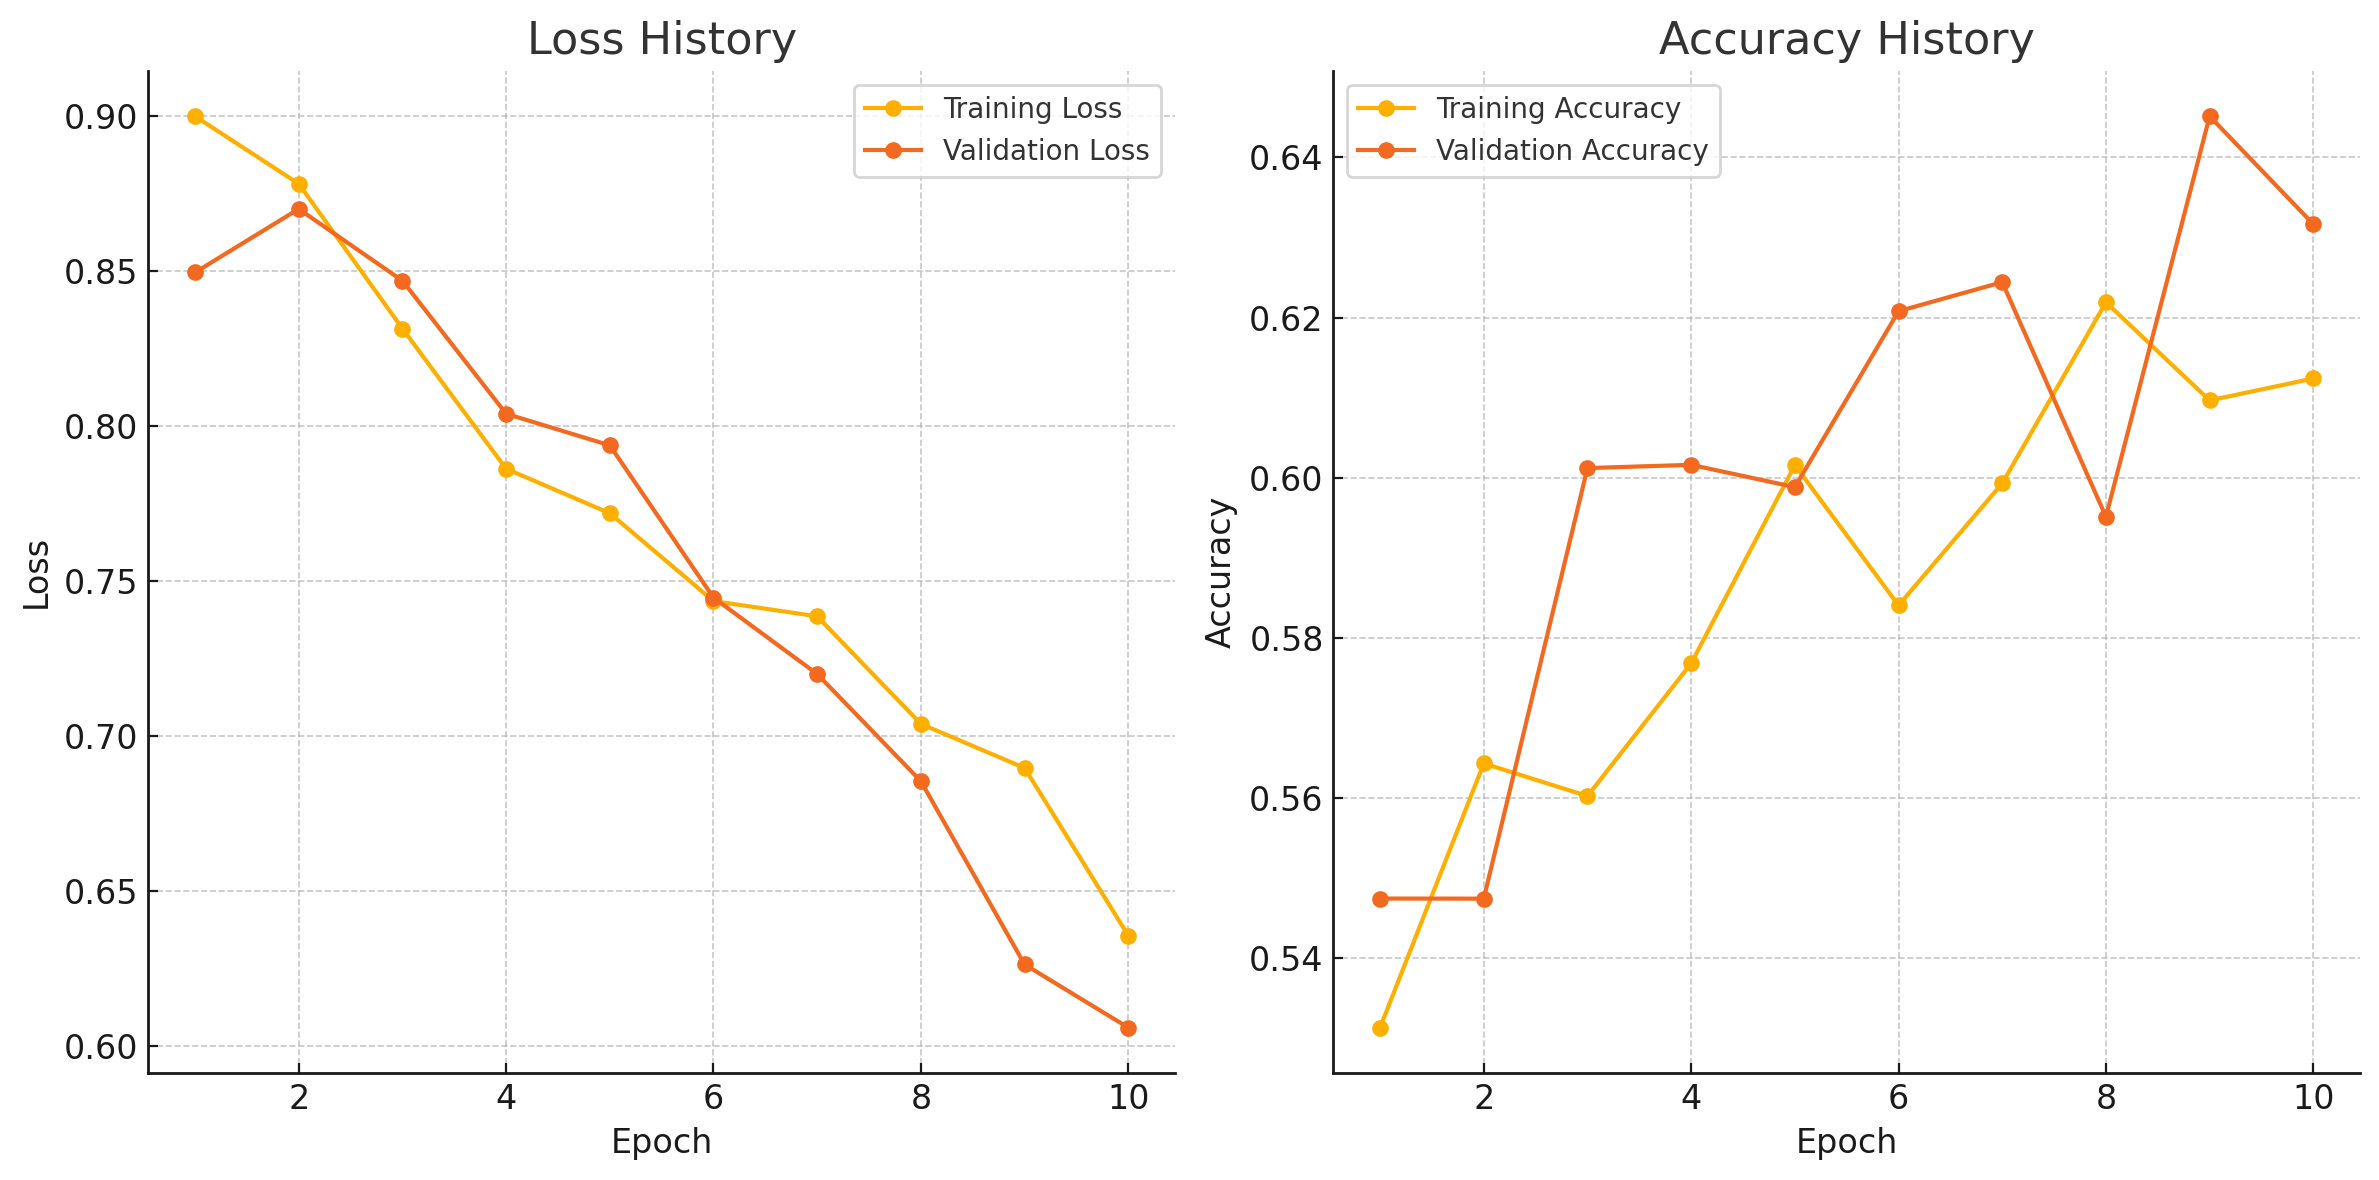

## Autoencoder

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Preprocessing: Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Step 1: Define Autoencoder Architecture
input_dim = x_scaled.shape[1]
encoding_dim = 64  # Reduced dimensionality

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder Model (for feature extraction)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(x_scaled, x_scaled, epochs=10, batch_size=32, verbose=1)

# Step 2: Extract Encoded Features
x_encoded = encoder.predict(x_scaled)

# Step 3: Convert Encoded Data into 3D Format for GRU
x_reshaped = x_encoded.reshape(x_encoded.shape[0], 1, x_encoded.shape[1])  # (samples, timesteps, features)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.2, random_state=42)

# Step 4: Build the GRU Model
gru_model = Sequential([
    GRU(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False, activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
gru_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_proba = gru_model.predict(x_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Step 5: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print all metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC: {auc_score:.2f}")


Epoch 1/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.6987
Epoch 2/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.6881
Epoch 3/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6892
Epoch 4/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6898
Epoch 5/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6879
Epoch 6/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6871
Epoch 7/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6886
Epoch 8/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6890
Epoch 9/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6901
Epoch 10/10
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.6876
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 31s 995us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.6107 - loss: 0.6507
Epoch 2/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6199 - loss: 0.6439
Epoch 3/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.6201 - loss: 0.6434
Epoch 4/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6213 - loss: 0.6421
Epoch 5/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6228 - loss: 0.6413
Epoch 6/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6230 - loss: 0.6410
Epoch 7/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6240 - loss: 0.6401
Epoch 8/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6237 - loss: 0.6395
Epoch 9/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6230 - loss: 0.6403
Epoch 10/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.6226 - loss: 0.6405
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Accuracy: 62.45%
Precision: 61.82%
Recall: 65.

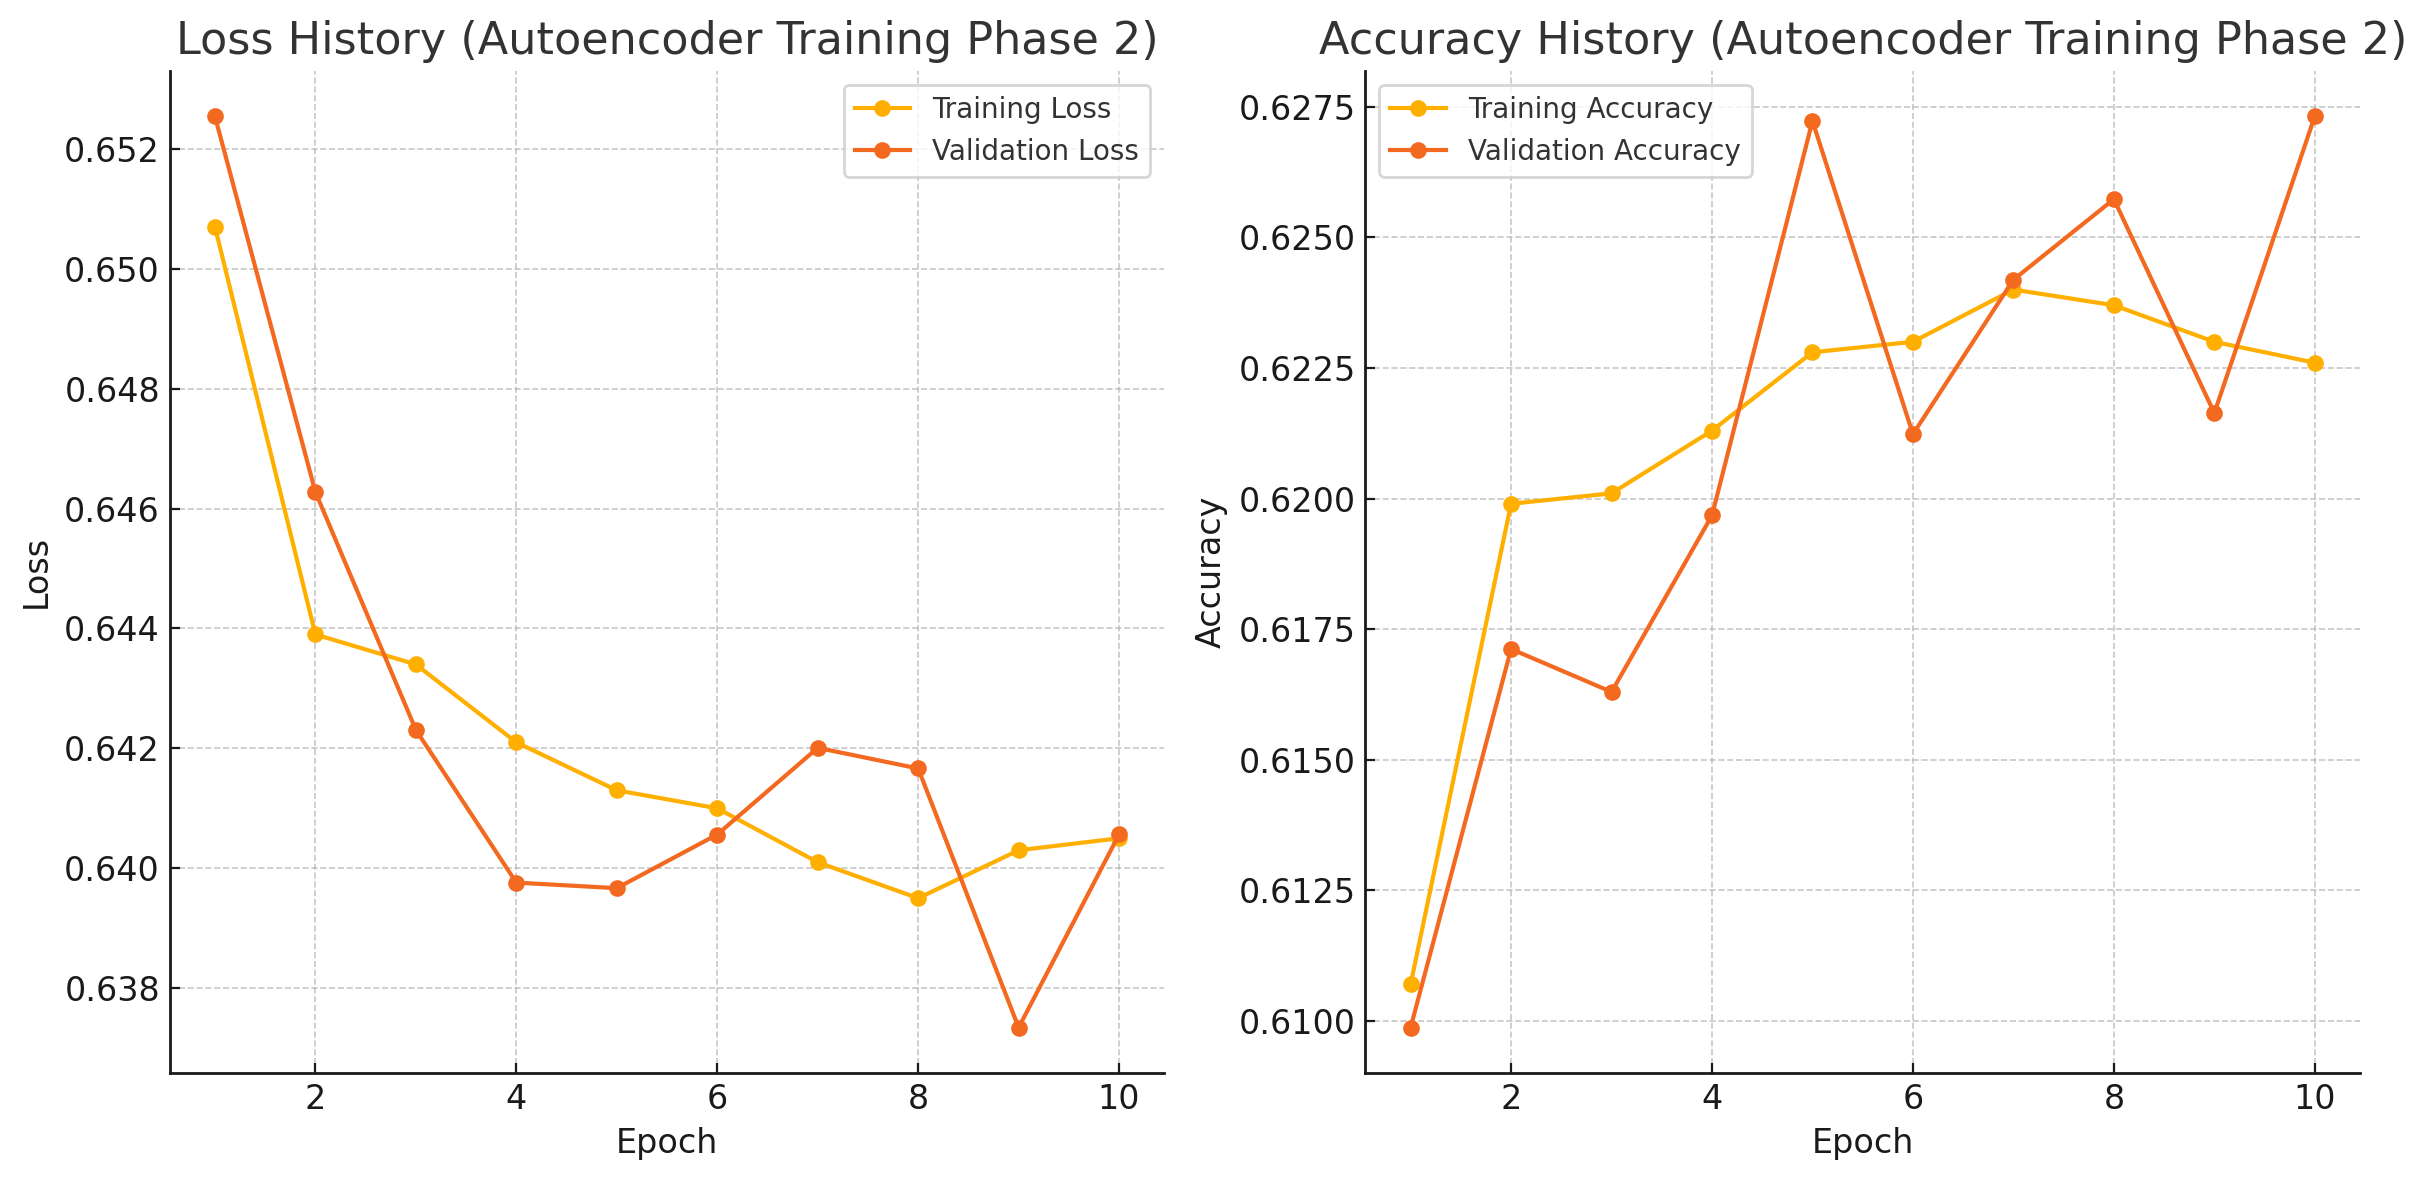

# ML Flow

In [ ]:
!pip install mlflow --quiet --ignore-installed blinker
!pip install pyngrok --quiet --ignore-installed blinker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is t

In [ ]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

In [ ]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [ ]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist
mlflow.set_experiment("Microsoft Malware Detection")

2024/09/20 01:20:57 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/09/20 01:20:57 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/content/mlruns/1', creation_time=1726795258540, experiment_id='1', last_update_time=1726795258540, lifecycle_stage='active', name='Microsoft Malware Detection', tags={}>

In [ ]:

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [ ]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://a039-34-45-217-225.ngrok-free.app" -> "http://127.0.0.1:5000"


In [ ]:
!pip install scikit-learn xgboost --quiet


In [ ]:
def log_metrics_and_model(model_name, model, X_test, y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Log metrics in MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("auc", auc_score)

    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{model_name} Precision: {precision * 100:.2f}%")
    print(f"{model_name} Recall: {recall * 100:.2f}%")
    print(f"{model_name} AUC: {auc_score:.2f}")

In [ ]:
with mlflow.start_run(run_name="XGBoost"):
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(x_train, y_train)

    y_pred_xgb = xgb_model.predict(x_test)
    y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]

    log_metrics_and_model("XGBoost", xgb_model, x_test, y_test, y_pred_xgb, y_pred_proba_xgb)

    # Log model in MLflow
    mlflow.xgboost.log_model(xgb_model, "xgb_model")

# Step 2: Log LightGBM Model
with mlflow.start_run(run_name="LightGBM"):
    lgb_model = lgb.LGBMClassifier()
    lgb_model.fit(x_train, y_train)

    y_pred_lgb = lgb_model.predict(x_test)
    y_pred_proba_lgb = lgb_model.predict_proba(x_test)[:, 1]

    log_metrics_and_model("LightGBM", lgb_model, x_test, y_test, y_pred_lgb, y_pred_proba_lgb)

    # Log model in MLflow
    mlflow.lightgbm.log_model(lgb_model, "lgb_model")

# Step 3: Log CatBoost Model
with mlflow.start_run(run_name="CatBoost"):
    catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
    catboost_model.fit(x_train, y_train)

    y_pred_cat = catboost_model.predict(x_test)
    y_pred_proba_cat = catboost_model.predict_proba(x_test)[:, 1]

    log_metrics_and_model("CatBoost", catboost_model, x_test, y_test, y_pred_cat, y_pred_proba_cat)

    # Log model in MLflow
    mlflow.catboost.log_model(catboost_model, "catboost_model")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 63.87%
XGBoost Precision: 64.09%
XGBoost Recall: 63.05%
XGBoost AUC: 0.70


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/09/20 01:39:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[LightGBM] [Info] Number of positive: 399833, number of negative: 400167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499791 -> initscore=-0.000835
[LightGBM] [Info] Start training from score -0.000835
LightGBM Accuracy: 63.72%
LightGBM Precision: 63.90%
LightGBM Recall: 63.05%
LightGBM AUC: 0.69


2024/09/20 01:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CatBoost Accuracy: 63.98%
CatBoost Precision: 64.23%
CatBoost Recall: 63.06%
CatBoost AUC: 0.70


2024/09/20 01:39:30 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpu6fq1nvi/model, flavor: catboost). Fall back to return ['catboost==1.2.7']. Set logging level to DEBUG to see the full traceback. 
2024/09/20 01:39:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


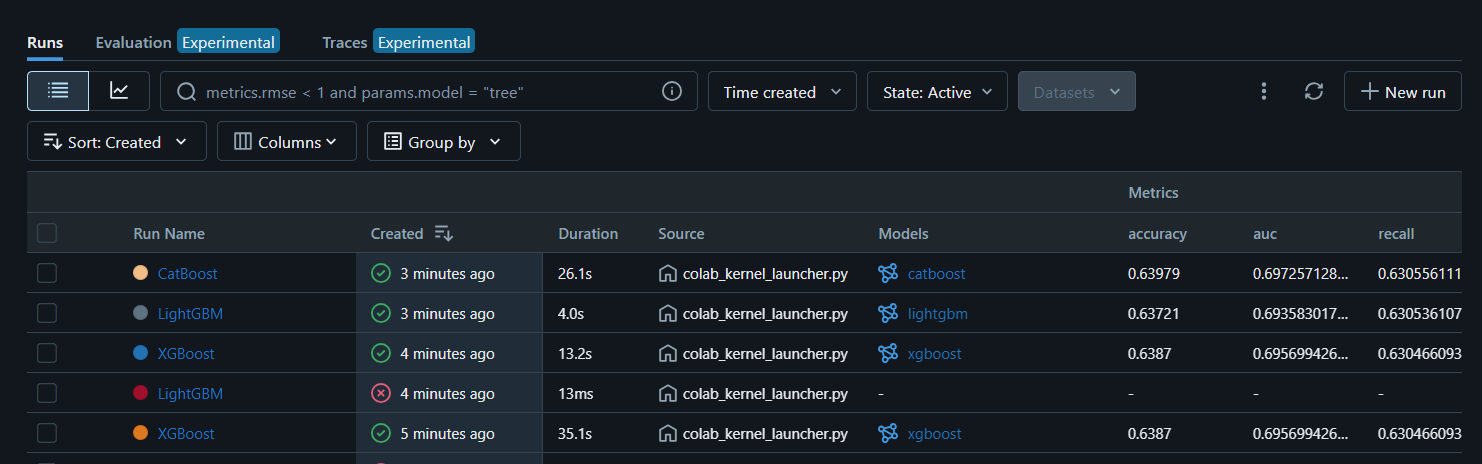